In [60]:
#import the necessary packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas as gpd
import geodatasets

# the code below sets the text to LaTEX font
plt.rcParams['text.usetex'] = True
# the code below sets the default figure and text size for all plots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

custom_palette = sns.color_palette("icefire")

# Download stopwords (run this only once)
#nltk.download('stopwords')
from wordcloud import WordCloud  # Ensure this import is included

In [61]:
# open the .csv file - the "header=0" part sets the first row as header of the dataframe
df = pd.read_csv('books.csv', header=0)
for i in df.columns:
  print("column name: ", i)
# now, I don't want to show the last column, i.e. Unnamed:10 --> I will delete it
df = df.drop(df.columns[-1], axis=1)

column name:  title
column name:  # pages
column name:  year of publication
column name:  author
column name:  publisher
column name:  year of birth
column name:  year of death
column name:  nationality
column name:  sex
column name:  language


In [62]:
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex
0,i colori di morrow,141,1972,a. bertram chandler,urania (mondadori),1912,1984,England - Australia,m
1,le armi di isher,454,1946,a.e. van vogt,nord,1912,2000,Canada,m
2,crociera nell'infinito,224,1950,a.e. van vogt,urania (mondadori),1912,2000,Canada,m
3,universo e dintorni,351,1978,VV.AA.,garzanti,/,/,/,/
4,the gospel according to david foster wallace,136,2016,adam s. miller,bloomsbury,NaN,NaN,United States of America,m
...,...,...,...,...,...,...,...,...,...
484,"bartleby, lo scrivano - benito cereno",151,1853 - 1855,herman melville,garzanti,1819,1891,United States of America,m
485,padri e figli,221,1862,ivan turgenev,mondadori,1818,1883,Russia,m
486,pigmalione,154,1912,bernard shaw,mondadori,1859,1950,Ireland,m
487,i racconti di nick adams,300,1972,ernest hemingway,mondadori,1899,1961,United States of America,m


In [63]:
# morevoer, I want the row index to start from 1 and not from 0
df = df.reset_index(drop=True)
df.index += 1
df

,title,# pages,year of publication,author,publisher,year of birth,year of death,nationality,sex
1,i colori di morrow,141,1972,a. bertram chandler,urania (mondadori),1912,1984,England - Australia,m
2,le armi di isher,454,1946,a.e. van vogt,nord,1912,2000,Canada,m
3,crociera nell'infinito,224,1950,a.e. van vogt,urania (mondadori),1912,2000,Canada,m
4,universo e dintorni,351,1978,VV.AA.,garzanti,/,/,/,/
5,the gospel according to david foster wallace,136,2016,adam s. miller,bloomsbury,NaN,NaN,United States of America,m
...,...,...,...,...,...,...,...,...,...
485,"bartleby, lo scrivano - benito cereno",151,1853 - 1855,herman melville,garzanti,1819,1891,United States of America,m
486,padri e figli,221,1862,ivan turgenev,mondadori,1818,1883,Russia,m
487,pigmalione,154,1912,bernard shaw,mondadori,1859,1950,Ireland,m
488,i racconti di nick adams,300,1972,ernest hemingway,mondadori,1899,1961,United States of America,m


In [64]:
#now I want to extract some information about the number of pages of these books
num_pag = df['# pages'] # I create an array from the column of the panda dataframe df['# pages']
mean_page = num_pag.mean()
median_page = num_pag.median()
quartiles_page = num_pag.quantile([0.25,0.75])

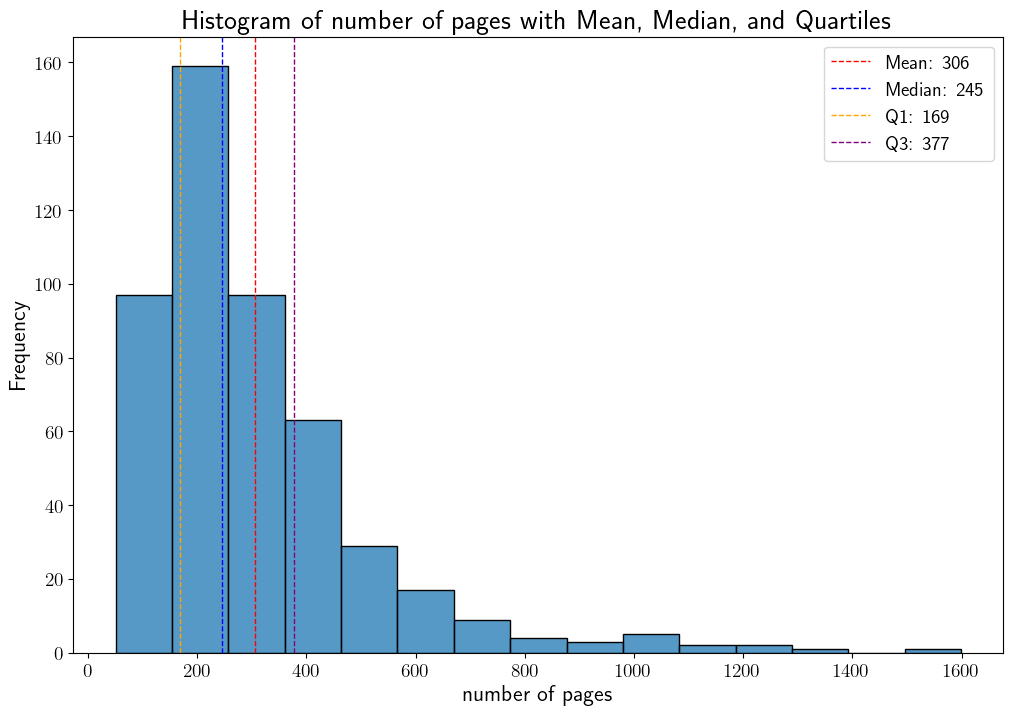

In [65]:
# Plot a histogram of column '# pages'
sns.histplot(df['# pages'], bins=15, kde=False)

# Add lines for mean, median, and quartiles
plt.axvline(mean_page, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_page:.0f}')
plt.axvline(median_page, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_page:.0f}')
plt.axvline(quartiles_page[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_page[0.25]:.0f}')
plt.axvline(quartiles_page[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_page[0.75]:.0f}')

# add titles
plt.title('Histogram of number of pages with Mean, Median, and Quartiles')
# add labels
plt.xlabel('number of pages')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/first_hist.png')
plt.show()

In [66]:
# now I want to obtain the same information for the year of publication of these books - at the best of my ability ot retrieve
# the information about the publication year
df['year of publication'] = df['year of publication'].replace(['/', 'V.Y.'], np.nan)
publ_year = df['year of publication']

df['year of publication'] = pd.to_numeric(df['year of publication'], errors='coerce')
publ_year = df['year of publication']

mean_pub_year = publ_year.mean()
median_pub_year = publ_year.median()
quartiles_pub_year = publ_year.quantile([0.25,0.75])

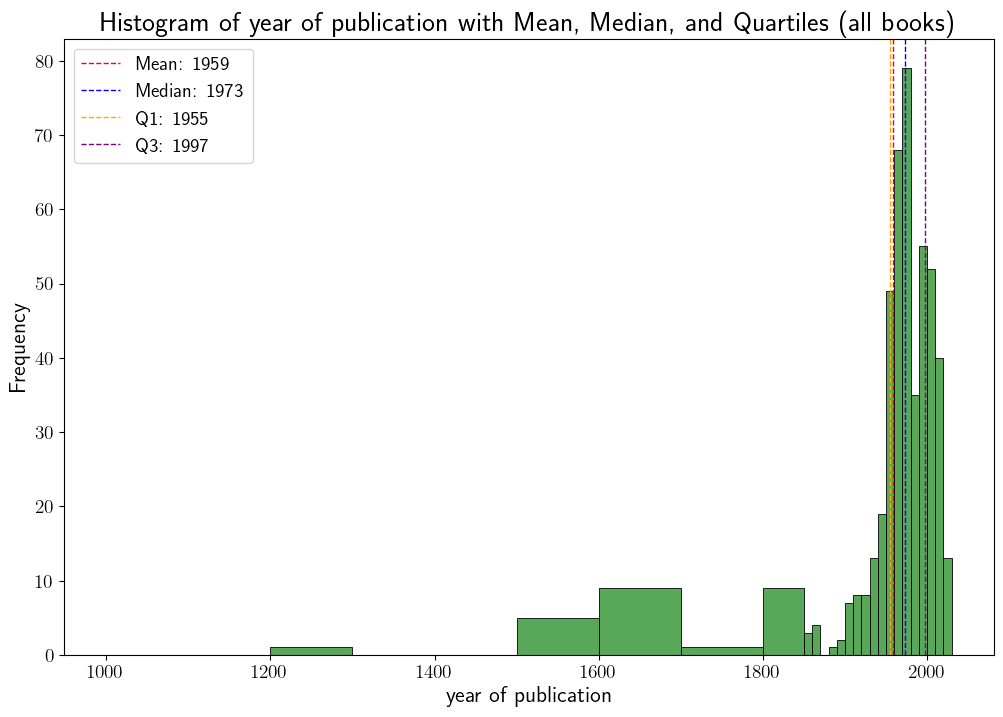

In [67]:
# Plot a histogram of column 'year of publication'
bins_publ_year = [1000,1100,1200,1300,1400,1500,1600,1700,1800,1850,1860,1870,
                  1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,
                  2000,2010,2020,2030]

sns.histplot(publ_year, bins=bins_publ_year, kde=False, color='forestgreen')

# Add lines for mean, median, and quartiles
plt.axvline(mean_pub_year, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dashed', linewidth=1, label=f'Median: {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dashed', linewidth=1, label=f'Q1: {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {quartiles_pub_year[0.75]:.0f}')

# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (all books)')
# add labels
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/second_hist.png')
plt.show()

this is not a very pleasant histogram. let's try to obtain a plot only with the books published starting from 1900.

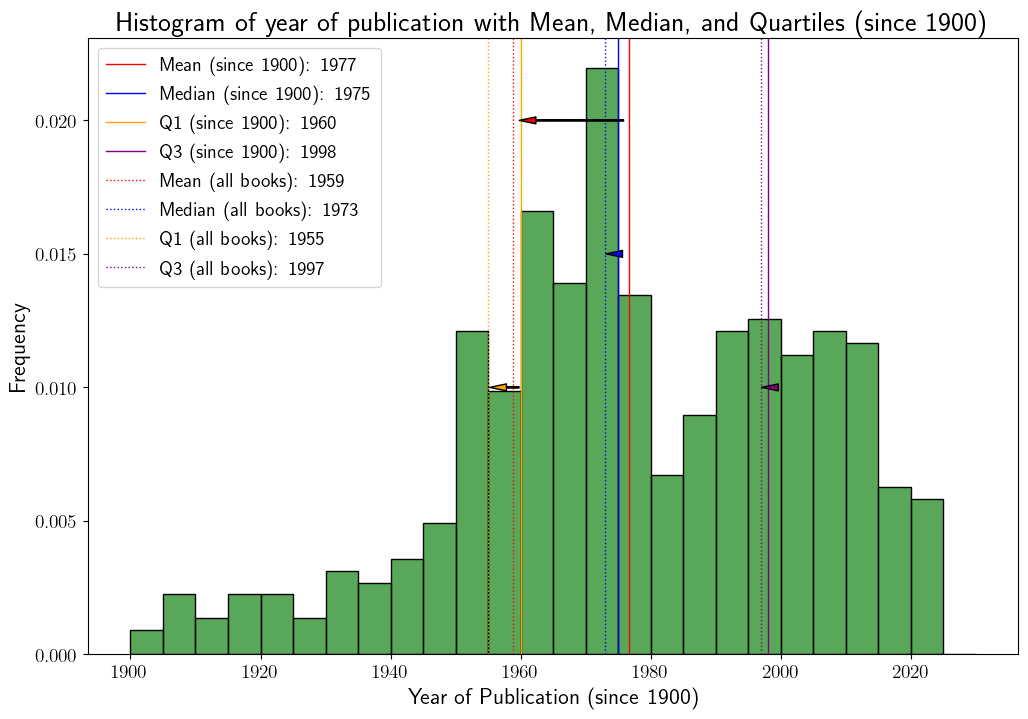

In [68]:
#####
# filter data for 20th century
publ_year_20th = publ_year[publ_year >= 1900]

bins_publ_year_20th = [1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,
                       1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030]
# plot histogram for the 20th century with density normalization
sns.histplot(publ_year_20th, bins=bins_publ_year_20th, stat='density', kde=False, color='forestgreen')

mean_pub_year_20th = publ_year_20th.mean()
median_pub_year_20th = publ_year_20th.median()
quartiles_pub_year_20th = publ_year_20th.quantile([0.25,0.75])

# add lines for mean, median, and quartiles only for books published after 1899
plt.axvline(mean_pub_year_20th, color='red', linestyle='solid', linewidth=1, label=f'Mean (since 1900): {mean_pub_year_20th:.0f}')
plt.axvline(median_pub_year_20th, color='blue', linestyle='solid', linewidth=1, label=f'Median (since 1900): {median_pub_year_20th:.0f}')
plt.axvline(quartiles_pub_year_20th[0.25], color='orange', linestyle='solid', linewidth=1, label=f'Q1 (since 1900): {quartiles_pub_year_20th[0.25]:.0f}')
plt.axvline(quartiles_pub_year_20th[0.75], color='purple', linestyle='solid', linewidth=1, label=f'Q3 (since 1900): {quartiles_pub_year_20th[0.75]:.0f}')

# add lines for mean, median, and quartiles for every book
plt.axvline(mean_pub_year, color='red', linestyle='dotted', linewidth=1, label=f'Mean (all books): {mean_pub_year:.0f}')
plt.axvline(median_pub_year, color='blue', linestyle='dotted', linewidth=1, label=f'Median (all books): {median_pub_year:.0f}')
plt.axvline(quartiles_pub_year[0.25], color='orange', linestyle='dotted', linewidth=1, label=f'Q1 (all books): {quartiles_pub_year[0.25]:.0f}')
plt.axvline(quartiles_pub_year[0.75], color='purple', linestyle='dotted', linewidth=1, label=f'Q3 (all books): {quartiles_pub_year[0.75]:.0f}')

# let's add some arrows that relate the different statistical quantities 
plt.annotate('', xy=(mean_pub_year, 0.02), xytext=(mean_pub_year_20th, 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(median_pub_year, 0.015), xytext=(median_pub_year_20th, 0.015),
             arrowprops=dict(facecolor='blue', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(quartiles_pub_year[0.25], 0.01), xytext=(quartiles_pub_year_20th[0.25], 0.01),
             arrowprops=dict(facecolor='orange', shrink=0.05, width=1, headwidth=5))
plt.annotate('', xy=(quartiles_pub_year[0.75], 0.01), xytext=(quartiles_pub_year_20th[0.75], 0.01),
             arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=5))

# add titles
plt.title('Histogram of year of publication with Mean, Median, and Quartiles (since 1900)')
# add labels
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Frequency')
plt.legend()
# Show the plot
plt.savefig('notebook_images/third_hist.png')

plt.show()

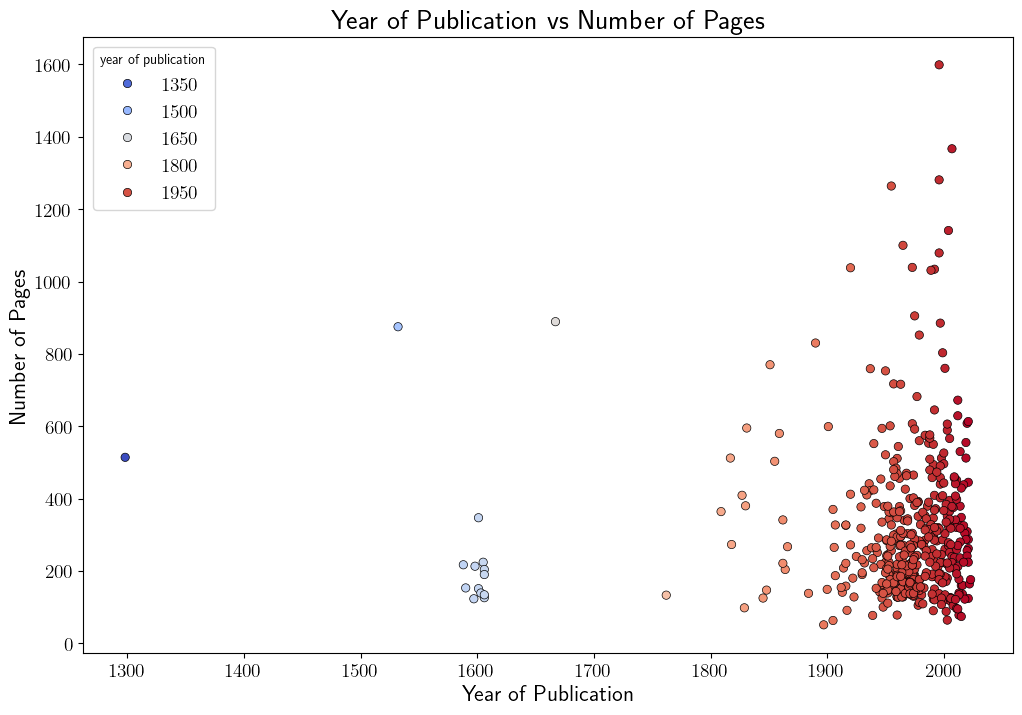

In [69]:
books_data_df = df[['# pages', 'year of publication']]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm',
                edgecolor='black')

# Add labels and a title
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')
plt.title('Year of Publication vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/first_plot.png')
plt.show()

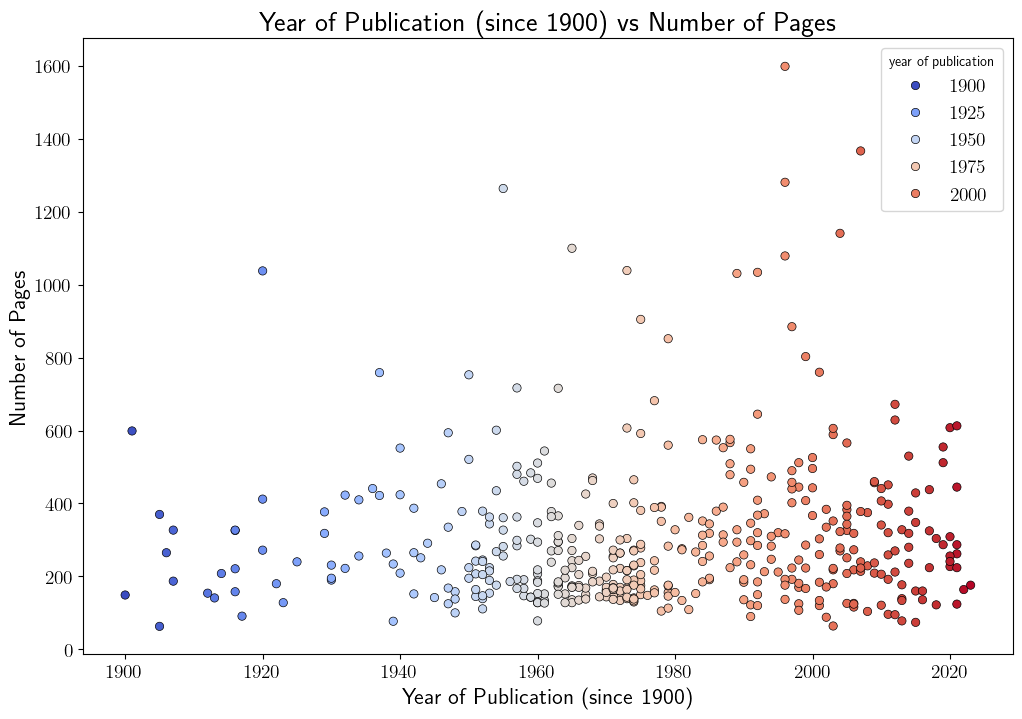

In [70]:
books_data_df_20th = df[df['year of publication'] > 1899]
# Create the scatter plot (x-y plot)
sns.scatterplot(data=books_data_df_20th, 
                x='year of publication', 
                y='# pages', 
                hue='year of publication', 
                palette='coolwarm',
                edgecolor='black')

# Add labels and a title
plt.xlabel('Year of Publication (since 1900)')
plt.ylabel('Number of Pages')
plt.title('Year of Publication (since 1900) vs Number of Pages')

# Show the plot
plt.savefig('notebook_images/second_plot.png')
plt.show()

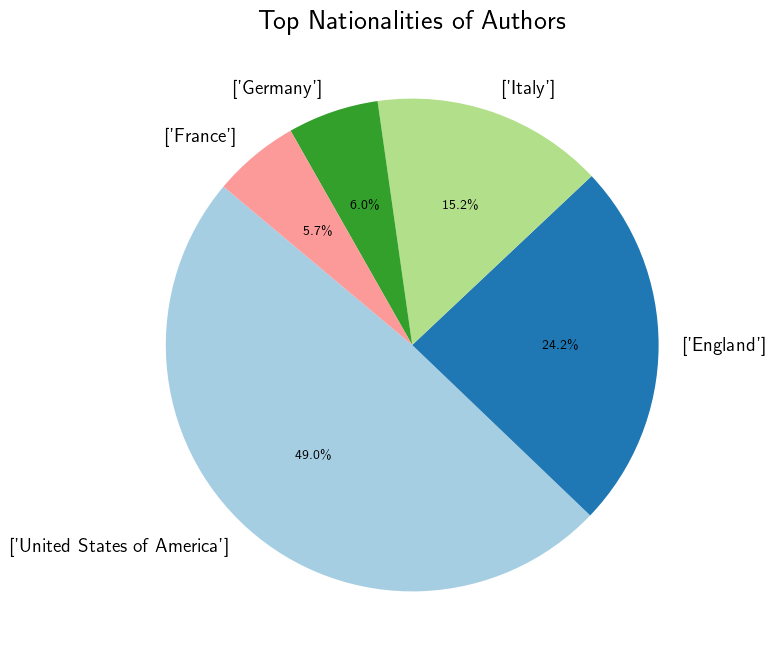

In [71]:
# Expand the DataFrame to have one nationality per row
# Split the 'nationalities' column by comma and explode into separate rows
df_expanded = df.assign(nationalities=df['nationality'].str.split(' - ')).explode('nationality')

# Remove any extra spaces and convert to lower case for consistency
df_expanded['nationality'] = df_expanded['nationality'].str.strip().str.lower()

# Count occurrences and filter top nationalities
nationality_counts = df_expanded['nationalities'].value_counts()
top_nationalities = nationality_counts.head(5)  # Change 5 to the number of top nationalities you want to display

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_nationalities, 
        labels=top_nationalities.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired(range(len(top_nationalities))))
plt.title('Top Nationalities of Authors')
plt.savefig('notebook_images/third_plot.png')

plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_54298/2903855139.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


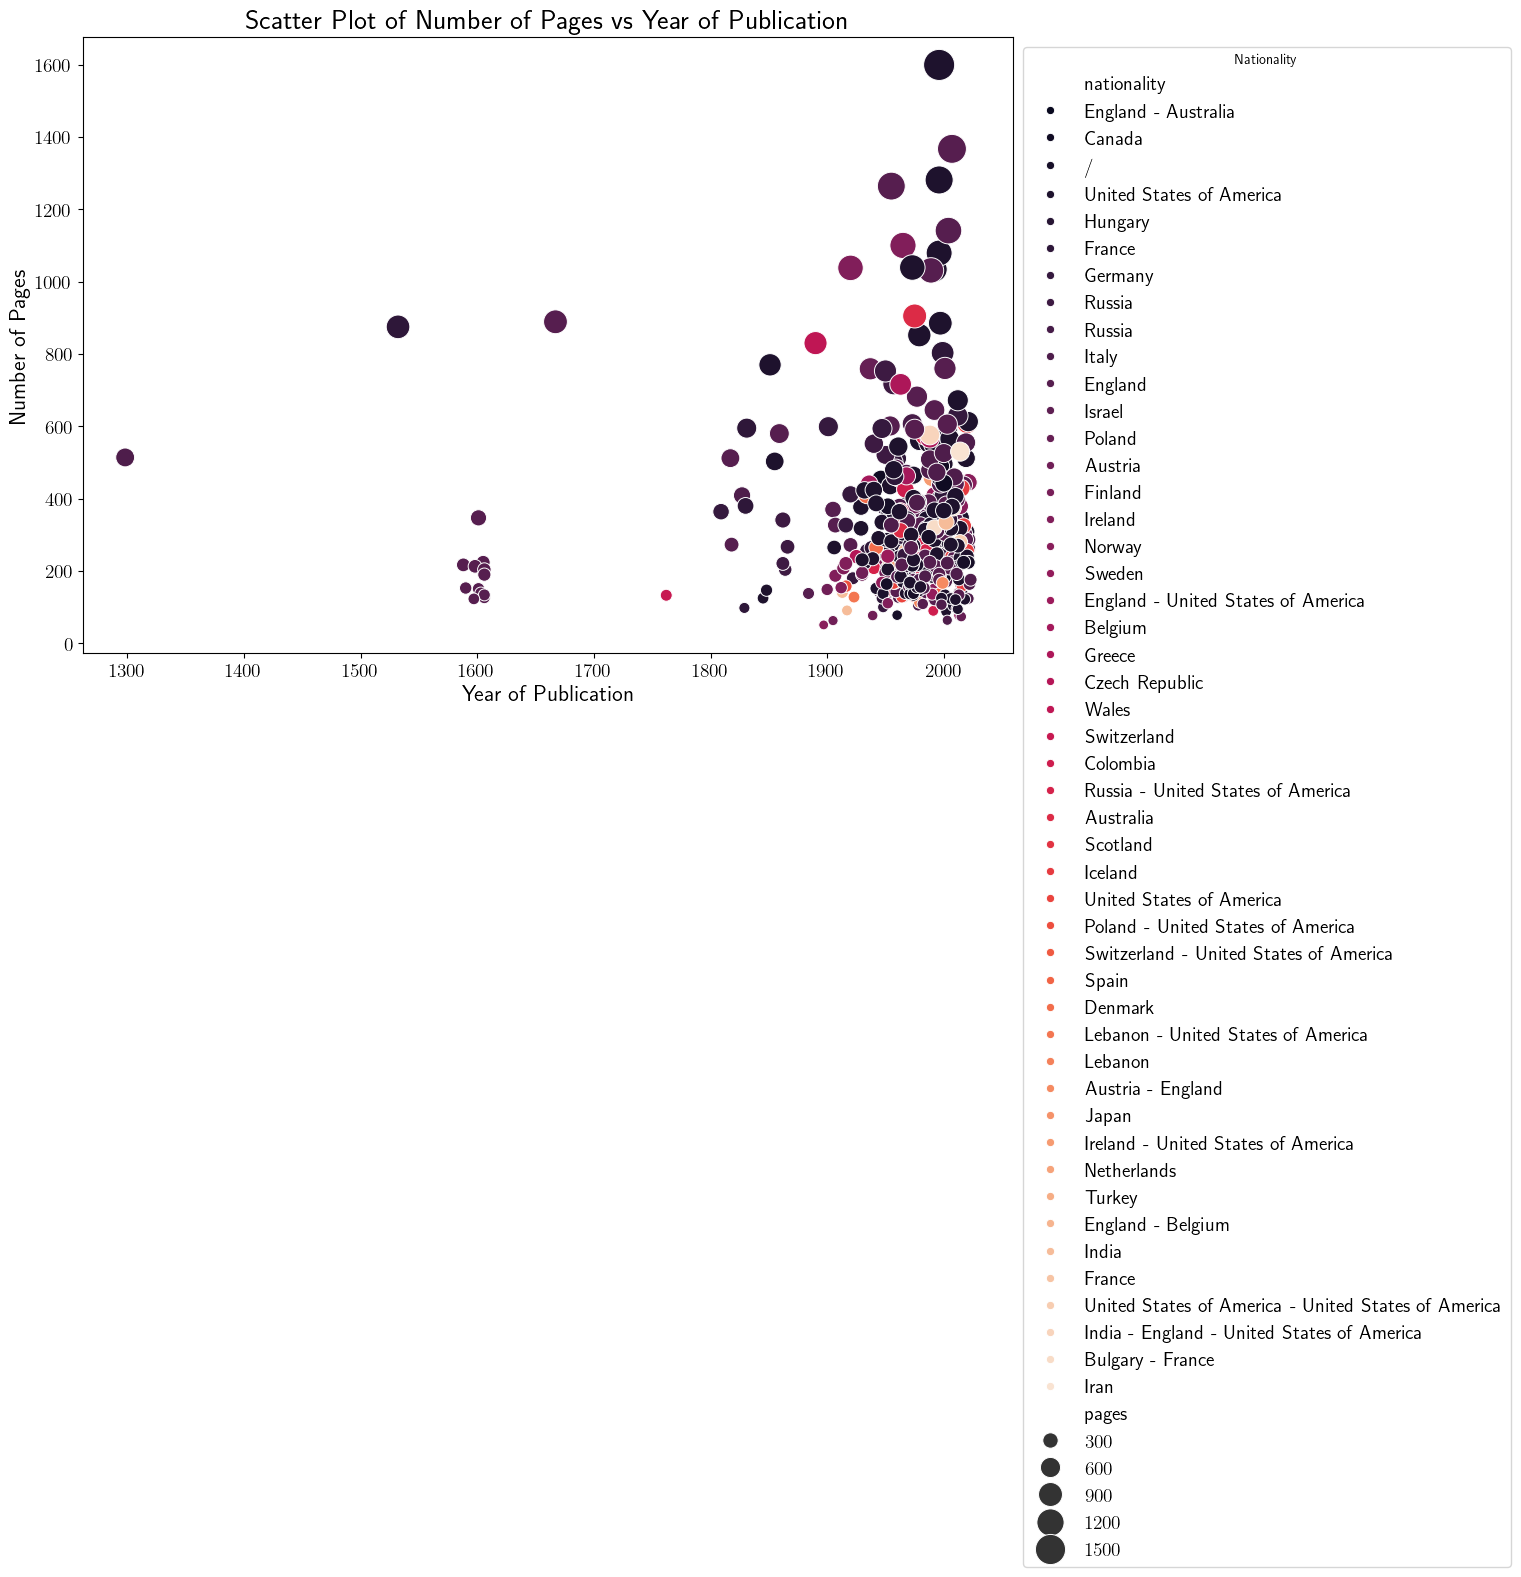

In [72]:
# rename columns to avoid LaTeX issues
df = df.rename(columns={'# pages': 'pages', 'year of publication': 'publication_year'})

# Create scatter plot
sns.scatterplot(data=df[['pages', 'publication_year', 'nationality']], 
                x='publication_year', 
                y='pages', 
                hue='nationality', 
                palette="rocket", 
                size='pages', 
                sizes=(50, 500), 
                legend='brief')


plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Nationality')
plt.title('Scatter Plot of Number of Pages vs Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')

plt.tight_layout()

plt.savefig('notebook_images/fourth_plot.png')
plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_54298/4275005953.py:12: UserWarning: The palette list has more values (48) than needed (47), which may not be intended.
  scatter = sns.scatterplot(data=df3_20th,


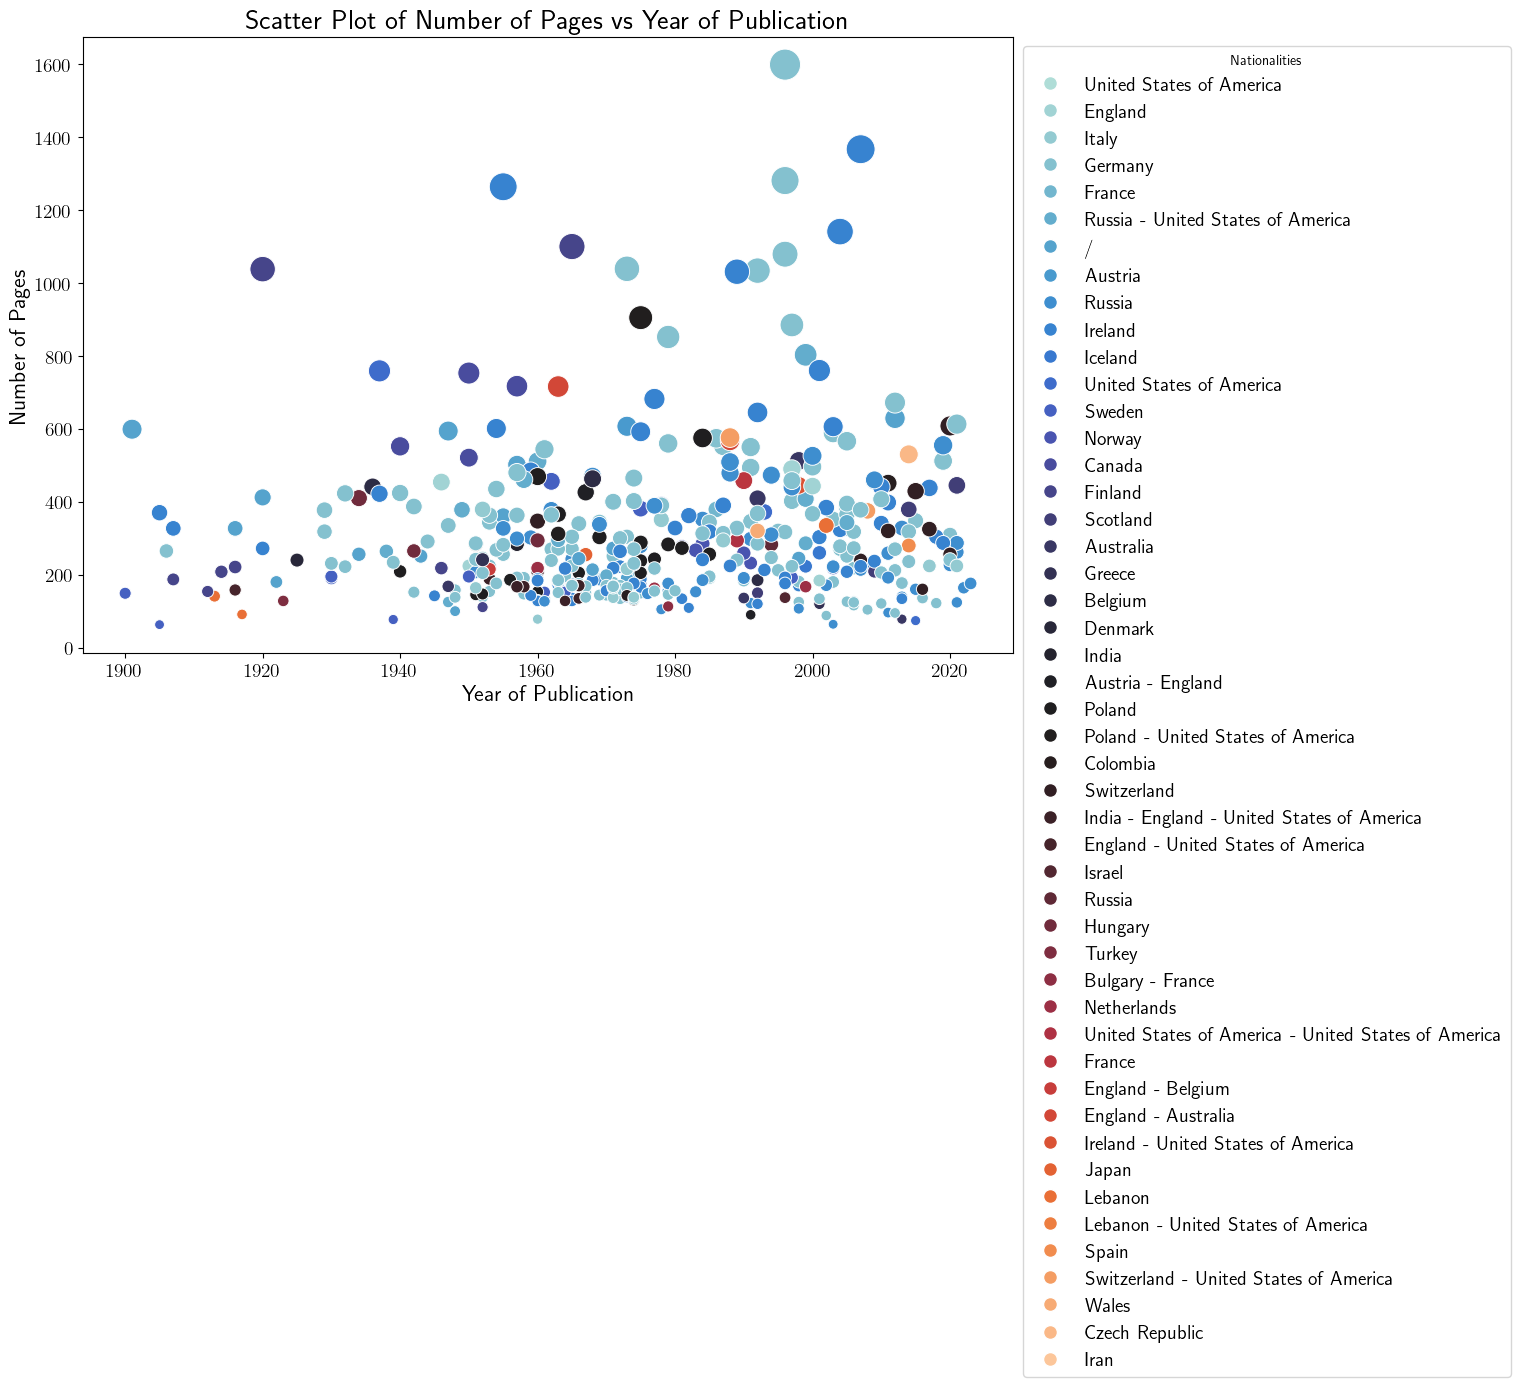

In [73]:
# Filter DataFrame for 20th century
df3_20th = df[df['publication_year'] > 1899]

# Calculate the counts of each nationality
nationality_counts = df['nationality'].value_counts()
sorted_nationalities = nationality_counts.index

# Use the same palette for scatter plot and legend
palette = sns.color_palette("icefire", len(sorted_nationalities))

# Create scatter plot
scatter = sns.scatterplot(data=df3_20th, 
                          x='publication_year', 
                          y='pages', 
                          hue='nationality', 
                          palette=palette,  # Use the same palette
                          size='pages', 
                          sizes=(50, 500))

# Create legend handles based on sorted nationalities and the colors used
handles = [Line2D([0], 
                  [0], 
                  marker='o', 
                  color='w', 
                  label=label,
                  markerfacecolor=palette[i], 
                  markersize=10)
           for i, label in enumerate(sorted_nationalities)]

# Add custom legend to the plot
plt.legend(handles=handles, loc='upper left', bbox_to_anchor=(1, 1), title='Nationalities')

# Add titles and labels
plt.title('Scatter Plot of Number of Pages vs Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Pages')

# Show the plot
plt.savefig('notebook_images/fifth_plot.png')
plt.show()

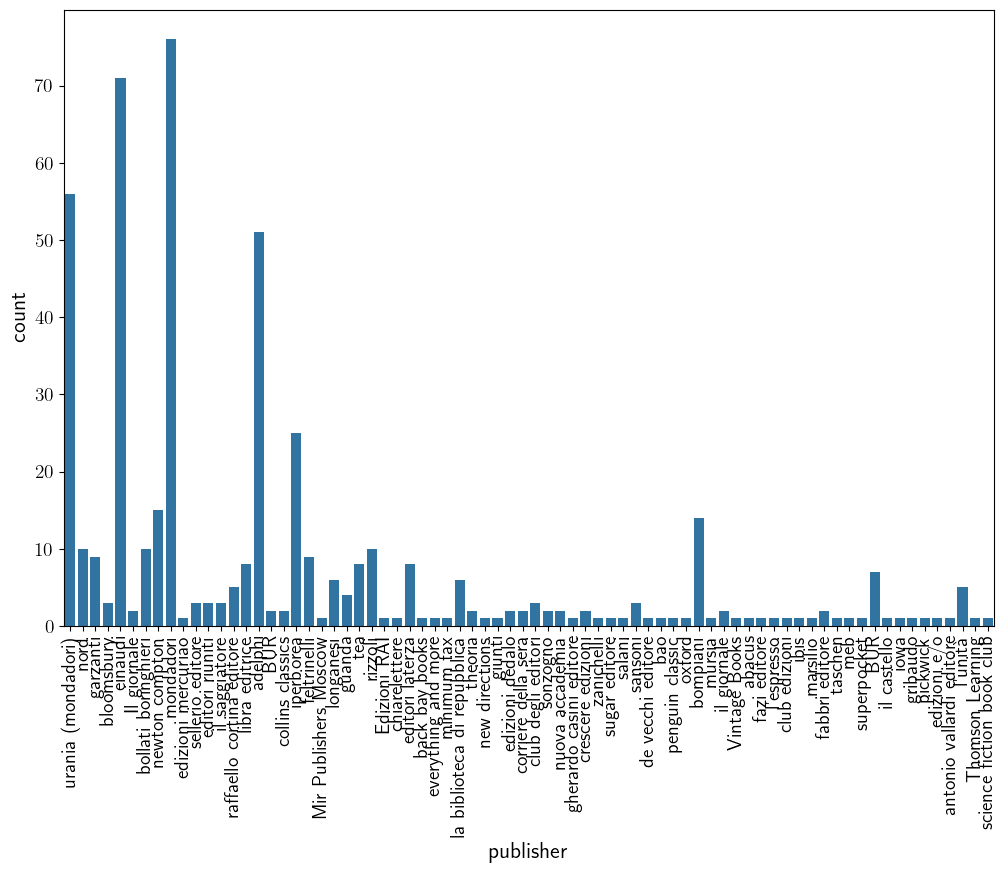

In [74]:
#let's create an histogram with the publisher data 
# Create a countplot to show the distribution of publishers
sns.countplot(data=df, x='publisher')

# Rotate x-axis labels if there are many unique publishers
plt.xticks(rotation=90)

# Show the plot
plt.savefig('notebook_images/stack_bar_publisher.png')
plt.show()

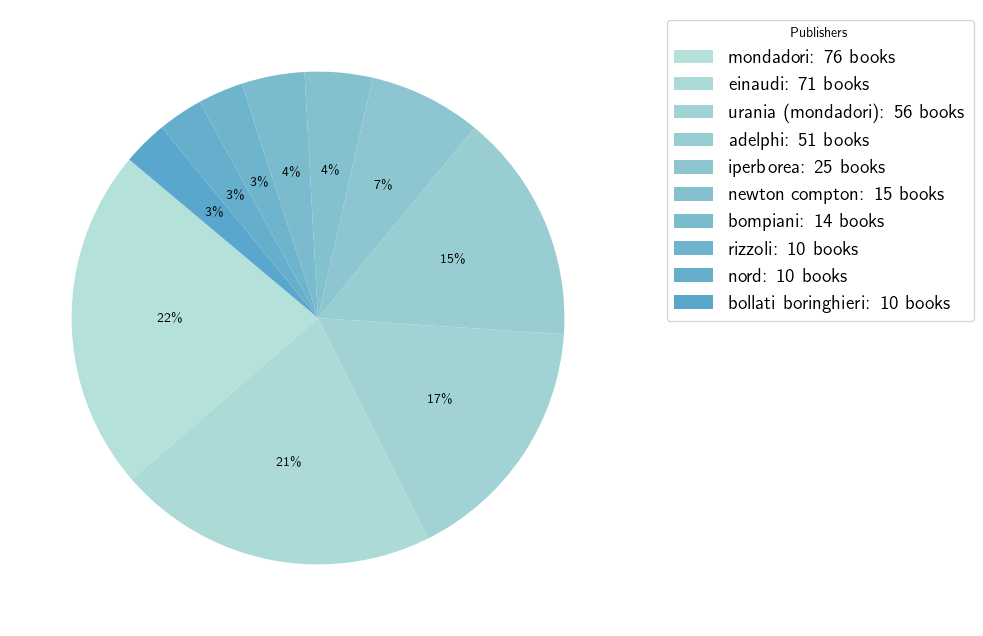

In [75]:
# Count the occurrences of each publisher
publisher_counts = df['publisher'].value_counts()
sorted_publisher = publisher_counts.index
top_publisher = publisher_counts.head(10)  # Change 5 to the number of top nationalities you want to display
palette = sns.color_palette("icefire", len(sorted_publisher))
# Plot pie chart
wedges, texts, autotexts = plt.pie(top_publisher, 
                                   autopct='%1.0f%%', 
                                   startangle=140, 
                                   colors=palette)
# Adding a custom legend with publisher names and counts
legend_labels = [f"{publisher}: {count} books" for publisher, 
                                                   count in zip(top_publisher.index, 
                                                                top_publisher.values)]
plt.legend(wedges, 
           legend_labels, 
           title="Publishers", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

plt.savefig('notebook_images/pie_chart_publisher.png')
plt.show()

                                     title  pages  publication_year  \
480       zohar - il libro dello splendore    700               NaN   
7    vita e morte dell'ordine dei templari    326            2005.0   
11                      romanzi e racconti    497               NaN   
104                                 eureka    147            1848.0   
103                   Racconti del terrore    125            1845.0   
..                                     ...    ...               ...   
472     sogno di una notte di mezza estate    153            1590.0   
468                      romeo e giulietta    123            1597.0   
469                                 amleto    347            1601.0   
471                                macbeth    204            1606.0   
474                       segnali da giove    156            1980.0   

                         author           publisher year of birth  \
480                           /             einaudi             /   
7        

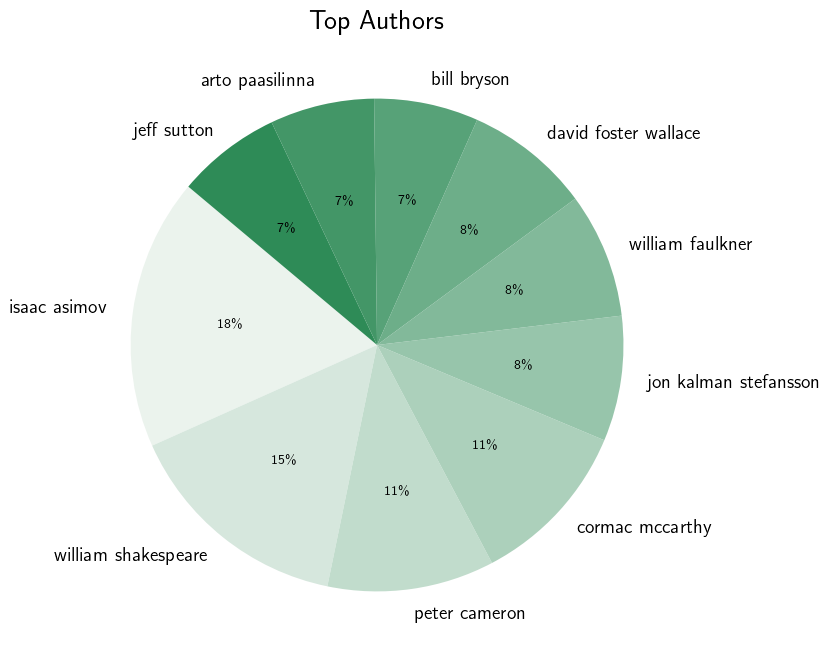

In [76]:
# Create a new pie chart with the top 10 authors

# Split the 'author' column by comma and explode into separate rows
filtered_df = df[df['author'] != 'VV.AA.']
print(filtered_df.sort_values(by='author'))
df_expanded = filtered_df.assign(authors=filtered_df['author'].str.split(' - ')).explode('author')

# Remove any extra spaces and convert to lower case for consistency
df_expanded['author'] = df_expanded['author'].str.strip().str.lower()

# Count occurrences and filter top nationalities
author_counts = df_expanded['author'].value_counts()
top_authors = author_counts.head(10)  # Change 5 to the number of top author you want to display

this_palette = sns.light_palette("seagreen", len(top_authors))
# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_authors, 
        labels=top_authors.index, 
        autopct='%1.0f%%', 
        startangle=140, 
        colors=this_palette)
plt.title('Top Authors')
plt.savefig('notebook_images/pie_chart_author.png')

plt.show()

/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_54298/1431894775.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap(this_color, len(sorted_unique_countries))


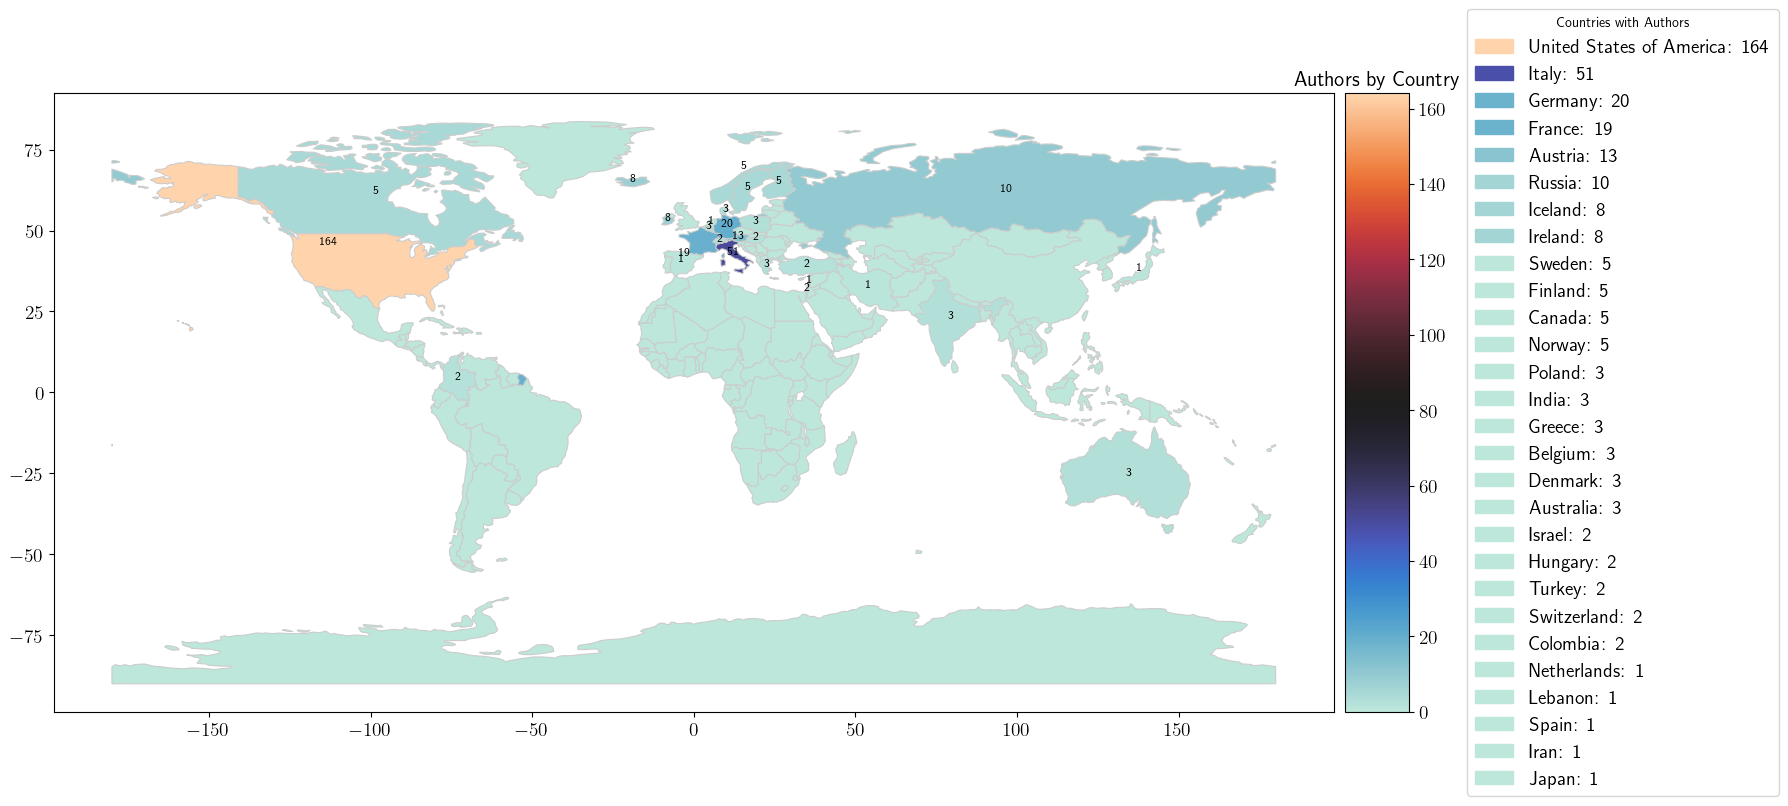

In [77]:
# Let's create a world map for the authors
#the color of this world map
this_color = 'icefire'
# provide the path for the shapefile...
shapefile_path = os.path.join('world_data/', 'ne_110m_admin_0_countries_lakes.shp')
# ...and load it
world = gpd.read_file(shapefile_path)
# the shapefile contains 'country' column with country names
# I called it 'nationality', so I have to change it
# Rename columns to match for the merge
df.rename(columns={'nationality': 'country'}, inplace=True)

# Create 'authors_count' column in the authors DataFrame
df['authors_count'] = 1  # Each row represents one author

# Aggregate counts by country
authors_count = df[df['author'] != 'VV.AA.'].groupby('country')['authors_count'].sum().reset_index()

# Merge the world map with your authors' data
world_authors = world.merge(authors_count, how='left', left_on='ADMIN', right_on='country')

# Fill NaN values with 0 (countries with no authors in your dataset)
world_authors['authors_count'] = world_authors['authors_count'].fillna(0)
  
# Normalize the colormap for better contrast
norm = mcolors.Normalize(vmin=world_authors['authors_count'].min(), vmax=world_authors['authors_count'].max())


# Plot the map with authors count as the colormap
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
world_authors.plot(column='authors_count', 
                   cmap=this_color, 
                   linewidth=0.8, 
                   edgecolor='0.8', 
                   #legend=True,
                   norm = norm, 
                   ax=ax)

# Create a colorbar axis next to the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=this_color, norm=norm)
sm._A = []  # Only necessary for compatibility reasons
fig.colorbar(sm, cax=cax)

# Add text annotations - if you want uncomment this
for idx, row in world_authors.iterrows():
    if row['authors_count'] > 0:  # Only label countries with authors
        # Get the centroid of the geometry for annotation position
        x, y = row['geometry'].centroid.coords[0]
        # Annotate the plot with the number of authors
        ax.annotate(
            text=int(row['authors_count']),  # The text to display
            xy=(x, y),  # Position of the annotation
            ha='center',  # Horizontal alignment
            fontsize=8,  # Font size
            color='black'  # Font color
        )
        
# # Create a custom legend with country names and counts
unique_countries = world_authors[world_authors['authors_count'] > 0][['ADMIN', 'authors_count']]
sorted_unique_countries = unique_countries.sort_values(by='authors_count', ascending=False)

# Generate colors for each country based on the colormap and author count
colormap = plt.cm.get_cmap(this_color, len(sorted_unique_countries))
legend_patches = []
for _, row in sorted_unique_countries.iterrows():
    color = colormap(norm(row['authors_count']))  # Get color from the colormap
    patch = mpatches.Patch(color=color, label=f"{row['ADMIN']}: {int(row['authors_count'])}")
    legend_patches.append(patch)
    
# Add the custom legend to the plot
plt.legend(handles=legend_patches, 
           title="Countries with Authors", 
           loc='center left', 
           bbox_to_anchor=(1.75, 0.5))

# Add a title
plt.title('Authors by Country', fontsize=15)
plt.tight_layout()

# Show the plot
plt.savefig('notebook_images/world_map.png', bbox_inches='tight')
plt.show()

                    author  pages
59    david foster wallace   3888
135           isaac asimov   3393
55         cormac mccarthy   2899
142          j.r.r.tolkien   2672
187            ken follett   2398
318       william faulkner   2263
175  jon kalman stefansson   2178
321    william shakespeare   2004
308            umberto eco   2004
37             bill bryson   1710


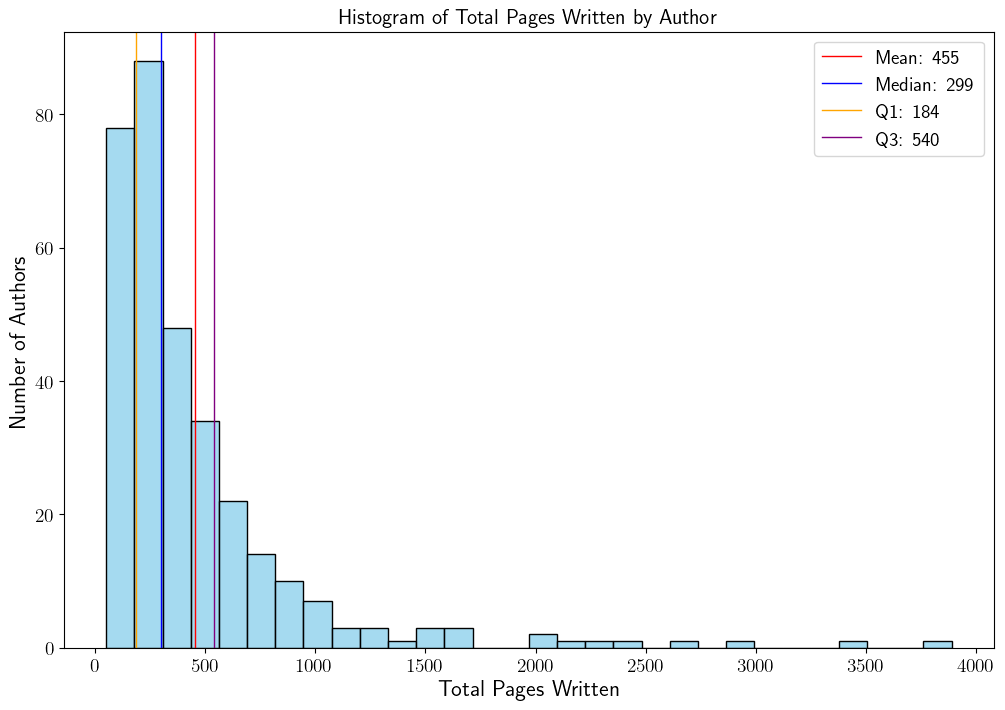

In [78]:
# Let's create an histogram with the most prolific writers
filtered_df = df[df['author'] != 'VV.AA.']
author_pages = filtered_df.groupby('author')['pages'].sum().reset_index()
author_pages = author_pages.sort_values(by='pages', ascending=False)
print(author_pages.head(10))

sns.histplot(author_pages['pages'], bins=30, kde=False, color='skyblue')

# Add titles and labels
plt.title('Histogram of Total Pages Written by Author', fontsize=15)
plt.xlabel('Total Pages Written')
plt.ylabel('Number of Authors')

mean_author_page = author_pages['pages'].mean()
median_author_page = author_pages['pages'].median()
quartiles_author_page = author_pages['pages'].quantile([0.25,0.75])

# add lines for mean, median, and quartiles only for books published after 1899
plt.axvline(mean_author_page, color='red', linestyle='solid', linewidth=1, label=f'Mean: {mean_author_page:.0f}')
plt.axvline(median_author_page, color='blue', linestyle='solid', linewidth=1, label=f'Median: {median_author_page:.0f}')
plt.axvline(quartiles_author_page[0.25], color='orange', linestyle='solid', linewidth=1, label=f'Q1: {quartiles_author_page[0.25]:.0f}')
plt.axvline(quartiles_author_page[0.75], color='purple', linestyle='solid', linewidth=1, label=f'Q3: {quartiles_author_page[0.75]:.0f}')

plt.legend()


# Show the plot
plt.savefig('notebook_images/author_pages_histogram.png')
plt.show()

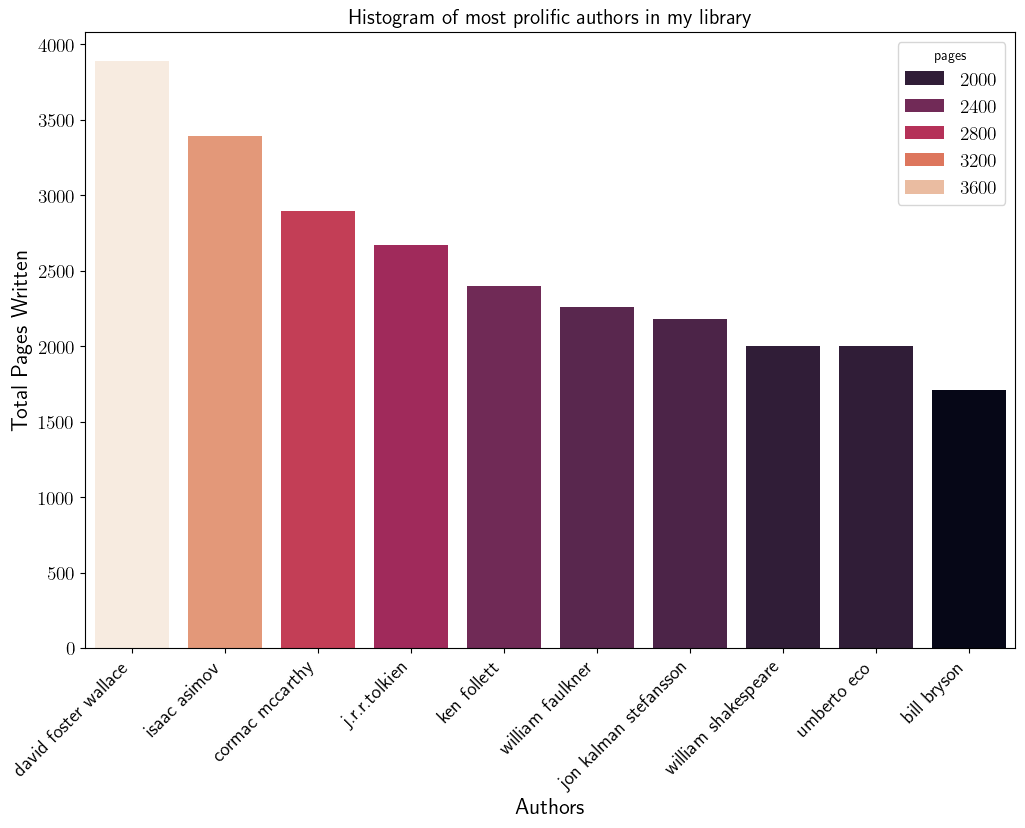

In [79]:
# now I will print out a plot for just the first 10 authors which have written the most pages
prolific_authors_df = author_pages.head(10)

barplot = sns.barplot(x=prolific_authors_df['author'], 
            y=prolific_authors_df['pages'], 
            hue=prolific_authors_df['pages'],
            palette='rocket',
            clip_on=False,
            data= prolific_authors_df
            )
    
# Add titles and labels
plt.title('Histogram of most prolific authors in my library', fontsize=15)
plt.xlabel('Authors')
plt.ylabel('Total Pages Written')
    
# Adjust layout for better visualization
plt.xticks(rotation=45, ha='right')
# Save the plot
plt.savefig('notebook_images/prolific_authors.png')
# Show the plot
plt.show()

                    author  title
135           isaac asimov     13
321    william shakespeare     11
243          peter cameron      8
55         cormac mccarthy      8
175  jon kalman stefansson      6
318       william faulkner      6
59    david foster wallace      6
171         john steinbeck      5
29         arto paasilinna      5
37             bill bryson      5


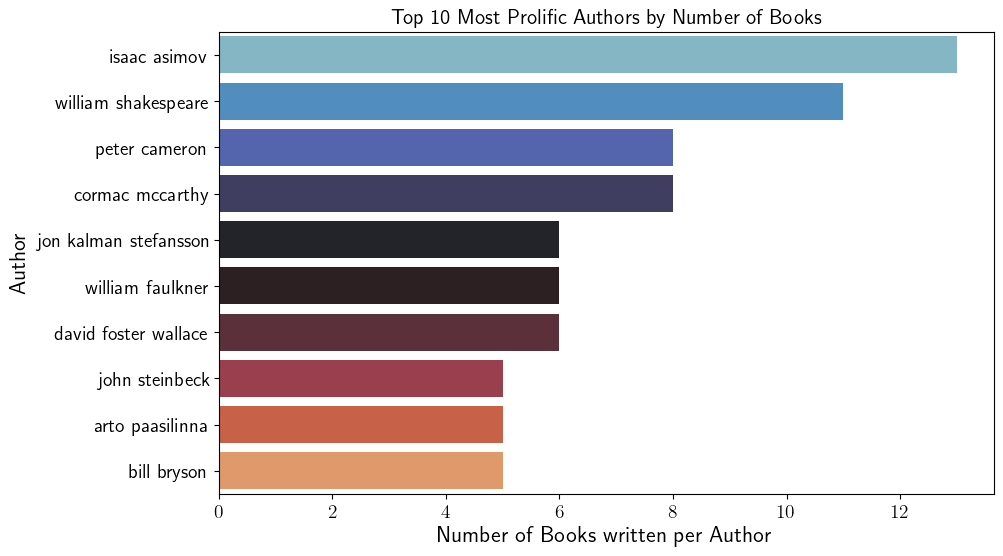

In [80]:
# Let's create an histogram with the number of nooks written by the authors
filtered_df = df[df['author'] != 'VV.AA.']
author_books = filtered_df.groupby('author')['title'].count().reset_index()
# Sort by the number of books written (in descending order)
author_books = author_books.sort_values(by='title', ascending=False)

# Print the top 10 authors with the most books
print(author_books.head(10))

# Optionally, if you want to visualize this information, you can create a bar plot:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for the top 10 most prolific authors
plt.figure(figsize=(10, 6))
sns.barplot(x='title', 
            y='author', 
            data=author_books.head(10), 
            palette='icefire',
            hue='author',
            legend=False)

# Add titles and labels
plt.title('Top 10 Most Prolific Authors by Number of Books', fontsize=15)
plt.xlabel('Number of Books written per Author')
plt.ylabel('Author')


# Save the plot
plt.savefig('notebook_images/prolific_authors_by_num_books.png')
# Show the plot
plt.show()

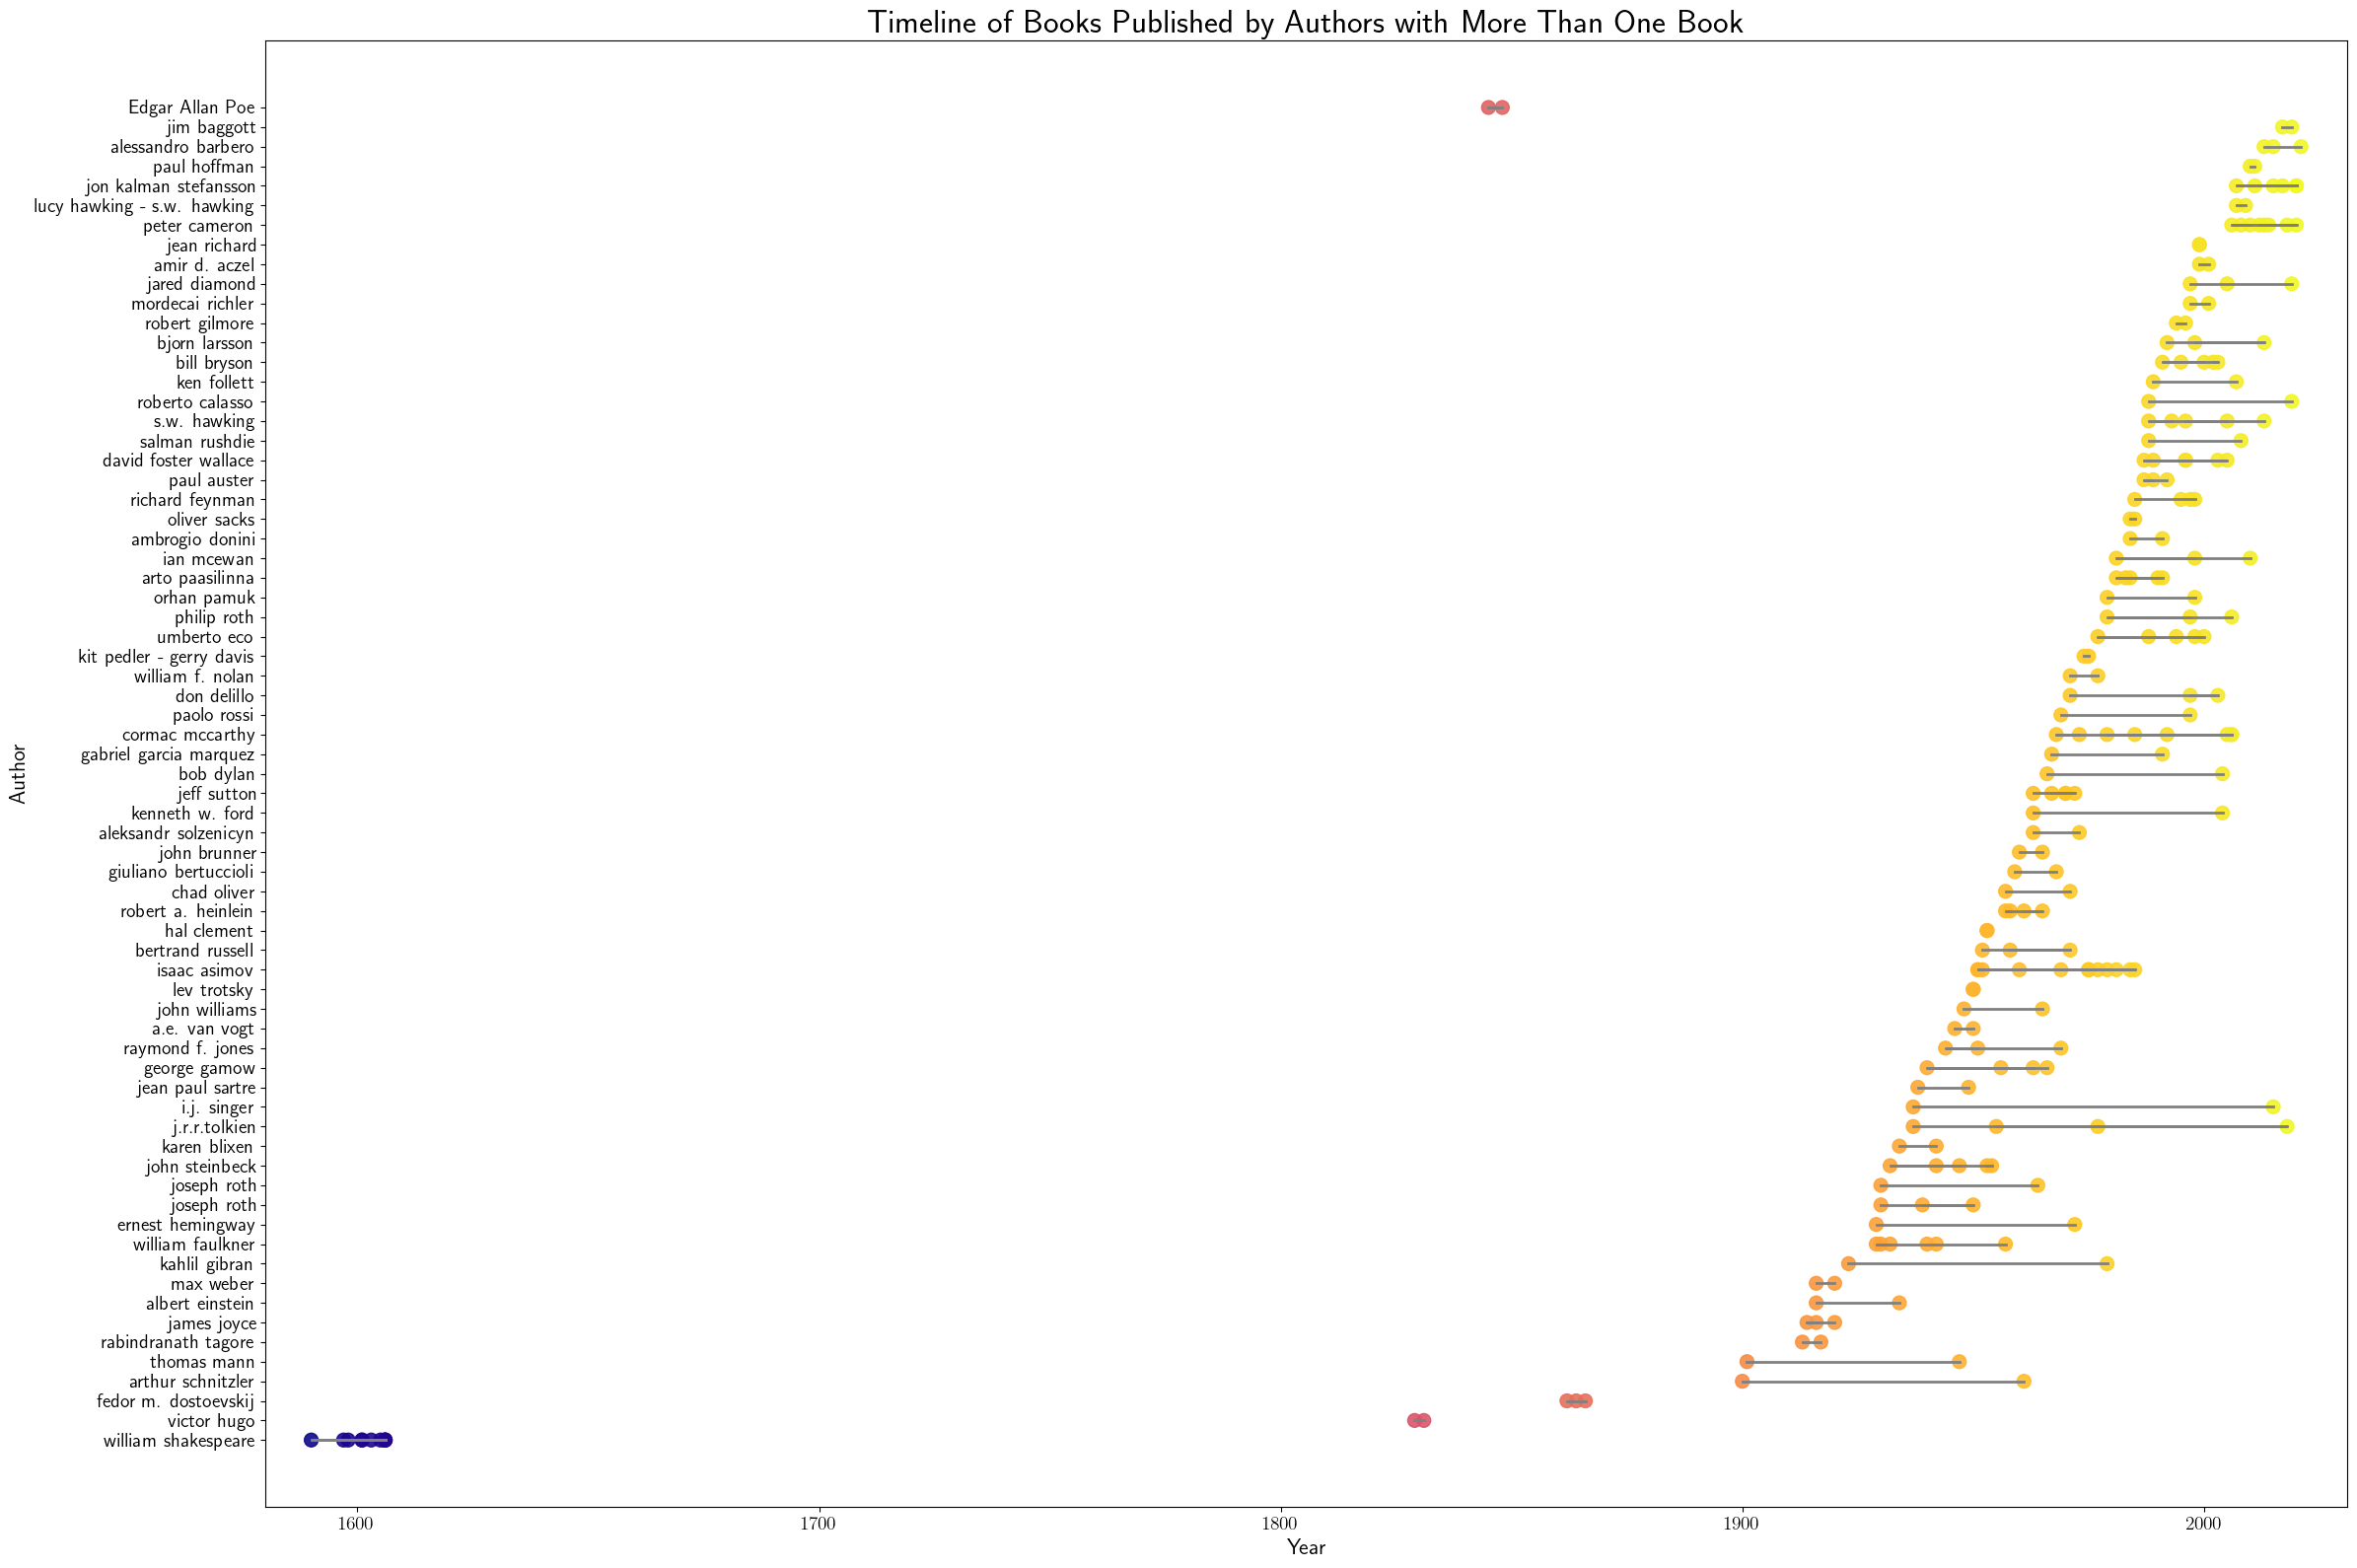

In [81]:
# Step 1: Group by author and count the number of books each author has written
author_book_counts = filtered_df.groupby('author')['publication_year'].count()

# Step 2: Filter authors who have more than one book
authors_with_multiple_books = author_book_counts[author_book_counts > 1].index

# Step 3: Filter the original DataFrame to include only these authors
filtered_authors_df = filtered_df[filtered_df['author'].isin(authors_with_multiple_books)]

# Step 4: Group by author and get all their publication years
author_books = filtered_authors_df.groupby('author')['publication_year'].apply(list).reset_index()

# Step 5: Sort authors by the first publication year (min)
author_books['min'] = author_books['publication_year'].apply(min)
author_books['max'] = author_books['publication_year'].apply(max)
author_books = author_books.sort_values(by='min')

plt.figure(figsize=(24, 16))

# Create a colormap based on the years
# Normalize publication_years to be between 0 and 1 for color mapping
norm = plt.Normalize(vmin=filtered_authors_df['publication_year'].min(), vmax=filtered_authors_df['publication_year'].max())
cmap = plt.cm.plasma  # You can choose other colormaps like 'coolwarm', 'plasma', 'inferno', etc.

# Plot all books for each author who has more than one book
for i, row in author_books.iterrows():
    # Normalize the years for colormap
    years = row['publication_year']
    colors = [cmap(norm(year)) for year in years]  # Get color for each year
    
    # Plot all books (with the specific color for each year)
    plt.scatter(x=years, 
                y=[row['author']] * len(years), 
                c=colors, 
                s=100, 
                label='Books' if i == 0 else "", 
                alpha=0.9)

    # Connect the books for each author with a line (gray)
    plt.plot(years, [row['author']] * len(years), color='gray', lw=2)

# Step 7: Add titles and labels
plt.title('Timeline of Books Published by Authors with More Than One Book', fontsize=24)
plt.xlabel('Year')
plt.ylabel('Author')

# Optionally, adjust the x-axis limits to better fit the data
plt.xlim(author_books['min'].min() - 10, author_books['max'].max() + 10)

# Add legend (optional, to show all books label only once)
#plt.legend()

# Save the plot
plt.savefig('notebook_images/timeline.png')
# Show the plot
plt.tight_layout()
plt.show()

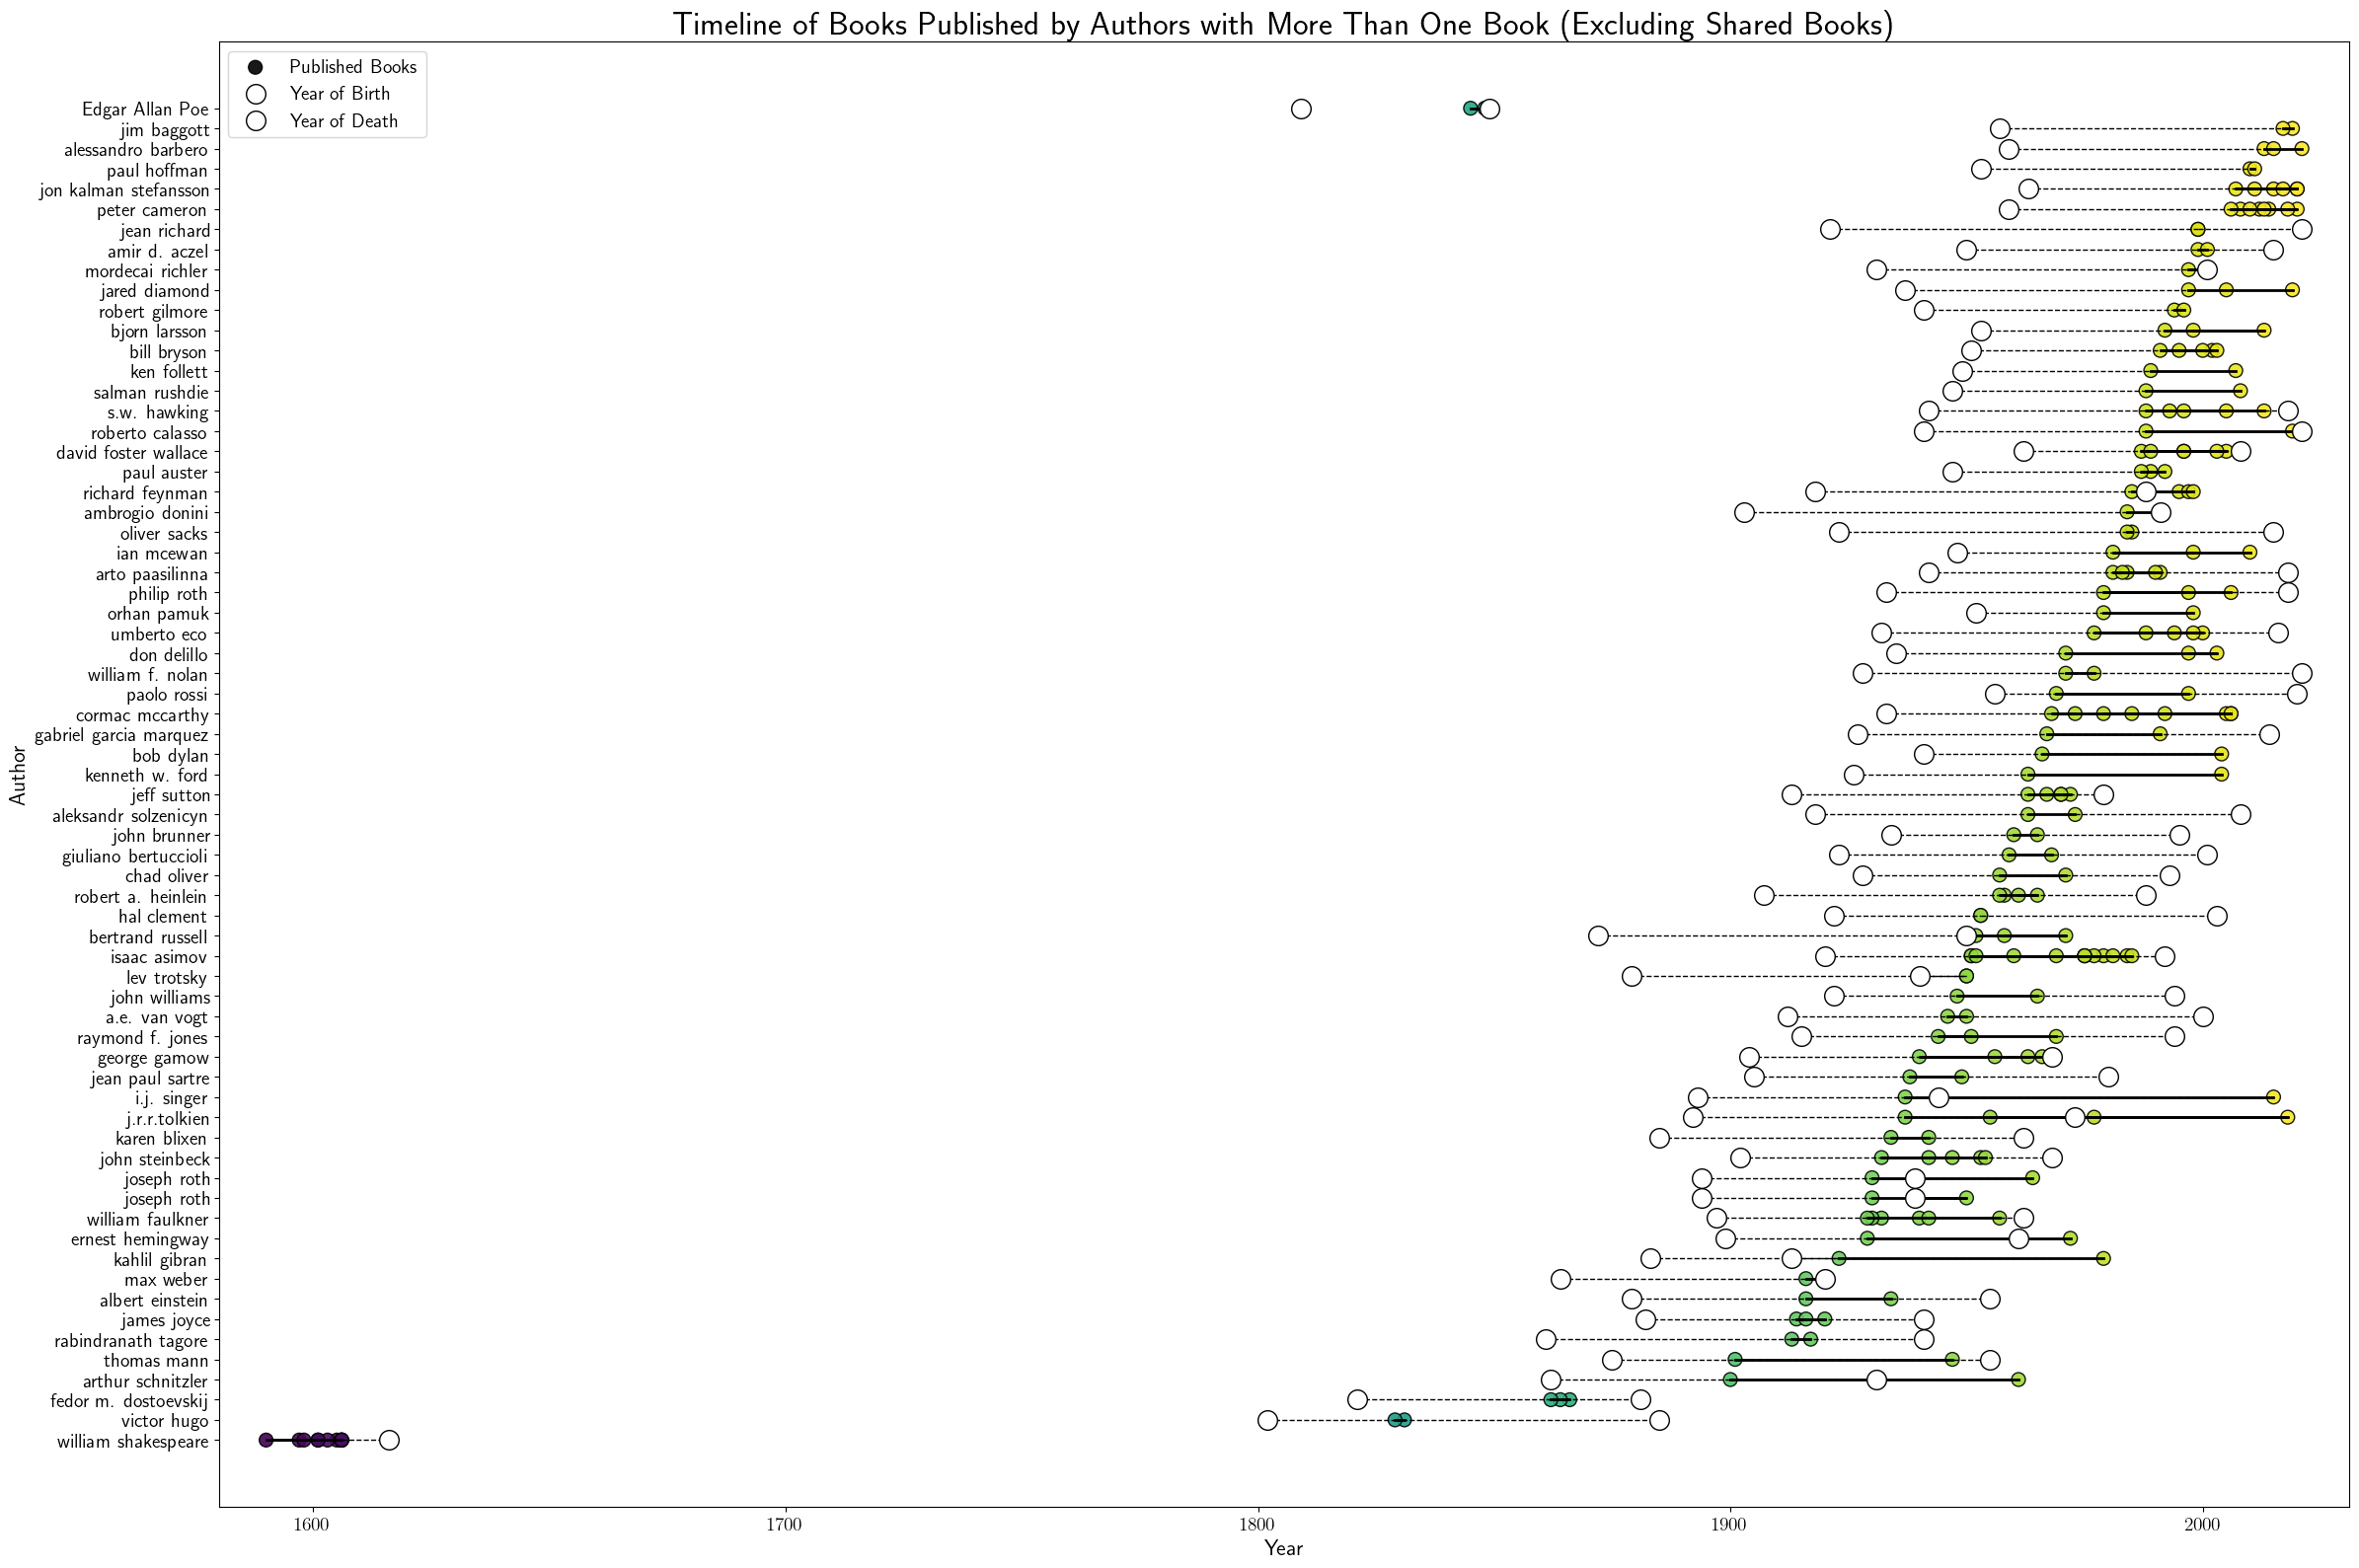

In [82]:
# Step 1: Filter out books with multiple authors
# Count the occurrences of " - " in 'authors' column to identify multiple authors
filtered_df_single_author = filtered_df[filtered_df['author'].str.count(" - ") == 0]

# Step 2: Group by author and count the number of books each author has written
# Since we have only single authors now, we can proceed
author_book_counts = filtered_df_single_author.groupby('author')['publication_year'].count()

# Step 3: Filter authors who have written more than one book
authors_with_multiple_books = author_book_counts[author_book_counts > 1].index

# Step 4: Filter the DataFrame to include only these authors
filtered_authors_df = filtered_df_single_author[filtered_df_single_author['author'].isin(authors_with_multiple_books)]

# Step 5: Group by author and get all their publication years
author_books = filtered_authors_df.groupby('author')['publication_year'].apply(list).reset_index()

# Step 6: Sort authors by the first publication year (min)
author_books['min'] = author_books['publication_year'].apply(min)
author_books['max'] = author_books['publication_year'].apply(max)
author_books = author_books.sort_values(by='min')

# Step 7: Create the plot
plt.figure(figsize=(24, 16))

# Create a colormap based on the years
norm = plt.Normalize(vmin=filtered_authors_df['publication_year'].min(), vmax=filtered_authors_df['publication_year'].max())
cmap = plt.cm.viridis

# Plot all books for each author who has more than one book
for i, row in author_books.iterrows():
    years = row['publication_year']
    colors = [cmap(norm(year)) for year in years]
    
    plt.scatter(x=years, y=[row['author']] * len(years), c=colors, edgecolors='black', s=100, label='Published Books' if i == 0 else "", alpha=0.9)
    plt.plot(years, [row['author']] * len(years), color='black', lw=2)

    author_name = row['author']
    birth_year = pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author_name]['year of birth'].values[0], errors='coerce')
    death_year = pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author_name]['year of death'].values[0], errors='coerce')
    
    if not np.isnan(birth_year):
        plt.scatter(birth_year, [author_name], color='white', edgecolors='black', s=200, marker='o', label='Year of Birth' if i == 0 else "", zorder=5)
        plt.plot([birth_year, years[0]], [author_name, author_name], color='black', linestyle='--', lw=1)

    if not np.isnan(death_year):
        plt.scatter(death_year, [author_name], color='white', edgecolors='black', s=200, marker='o', label='Year of Death' if i == 0 else "", zorder=5)
        plt.plot([years[-1], death_year], [author_name, author_name], color='black', linestyle='--', lw=1)

# Step 8: Add titles and labels
plt.title('Timeline of Books Published by Authors with More Than One Book (Excluding Shared Books)', fontsize=24)
plt.xlabel('Year')
plt.ylabel('Author')
plt.xlim(author_books['min'].min() - 10, author_books['max'].max() + 10)
plt.legend()
plt.tight_layout()
# Save the plot
plt.savefig('notebook_images/timeline_adjusted.png')
plt.show()


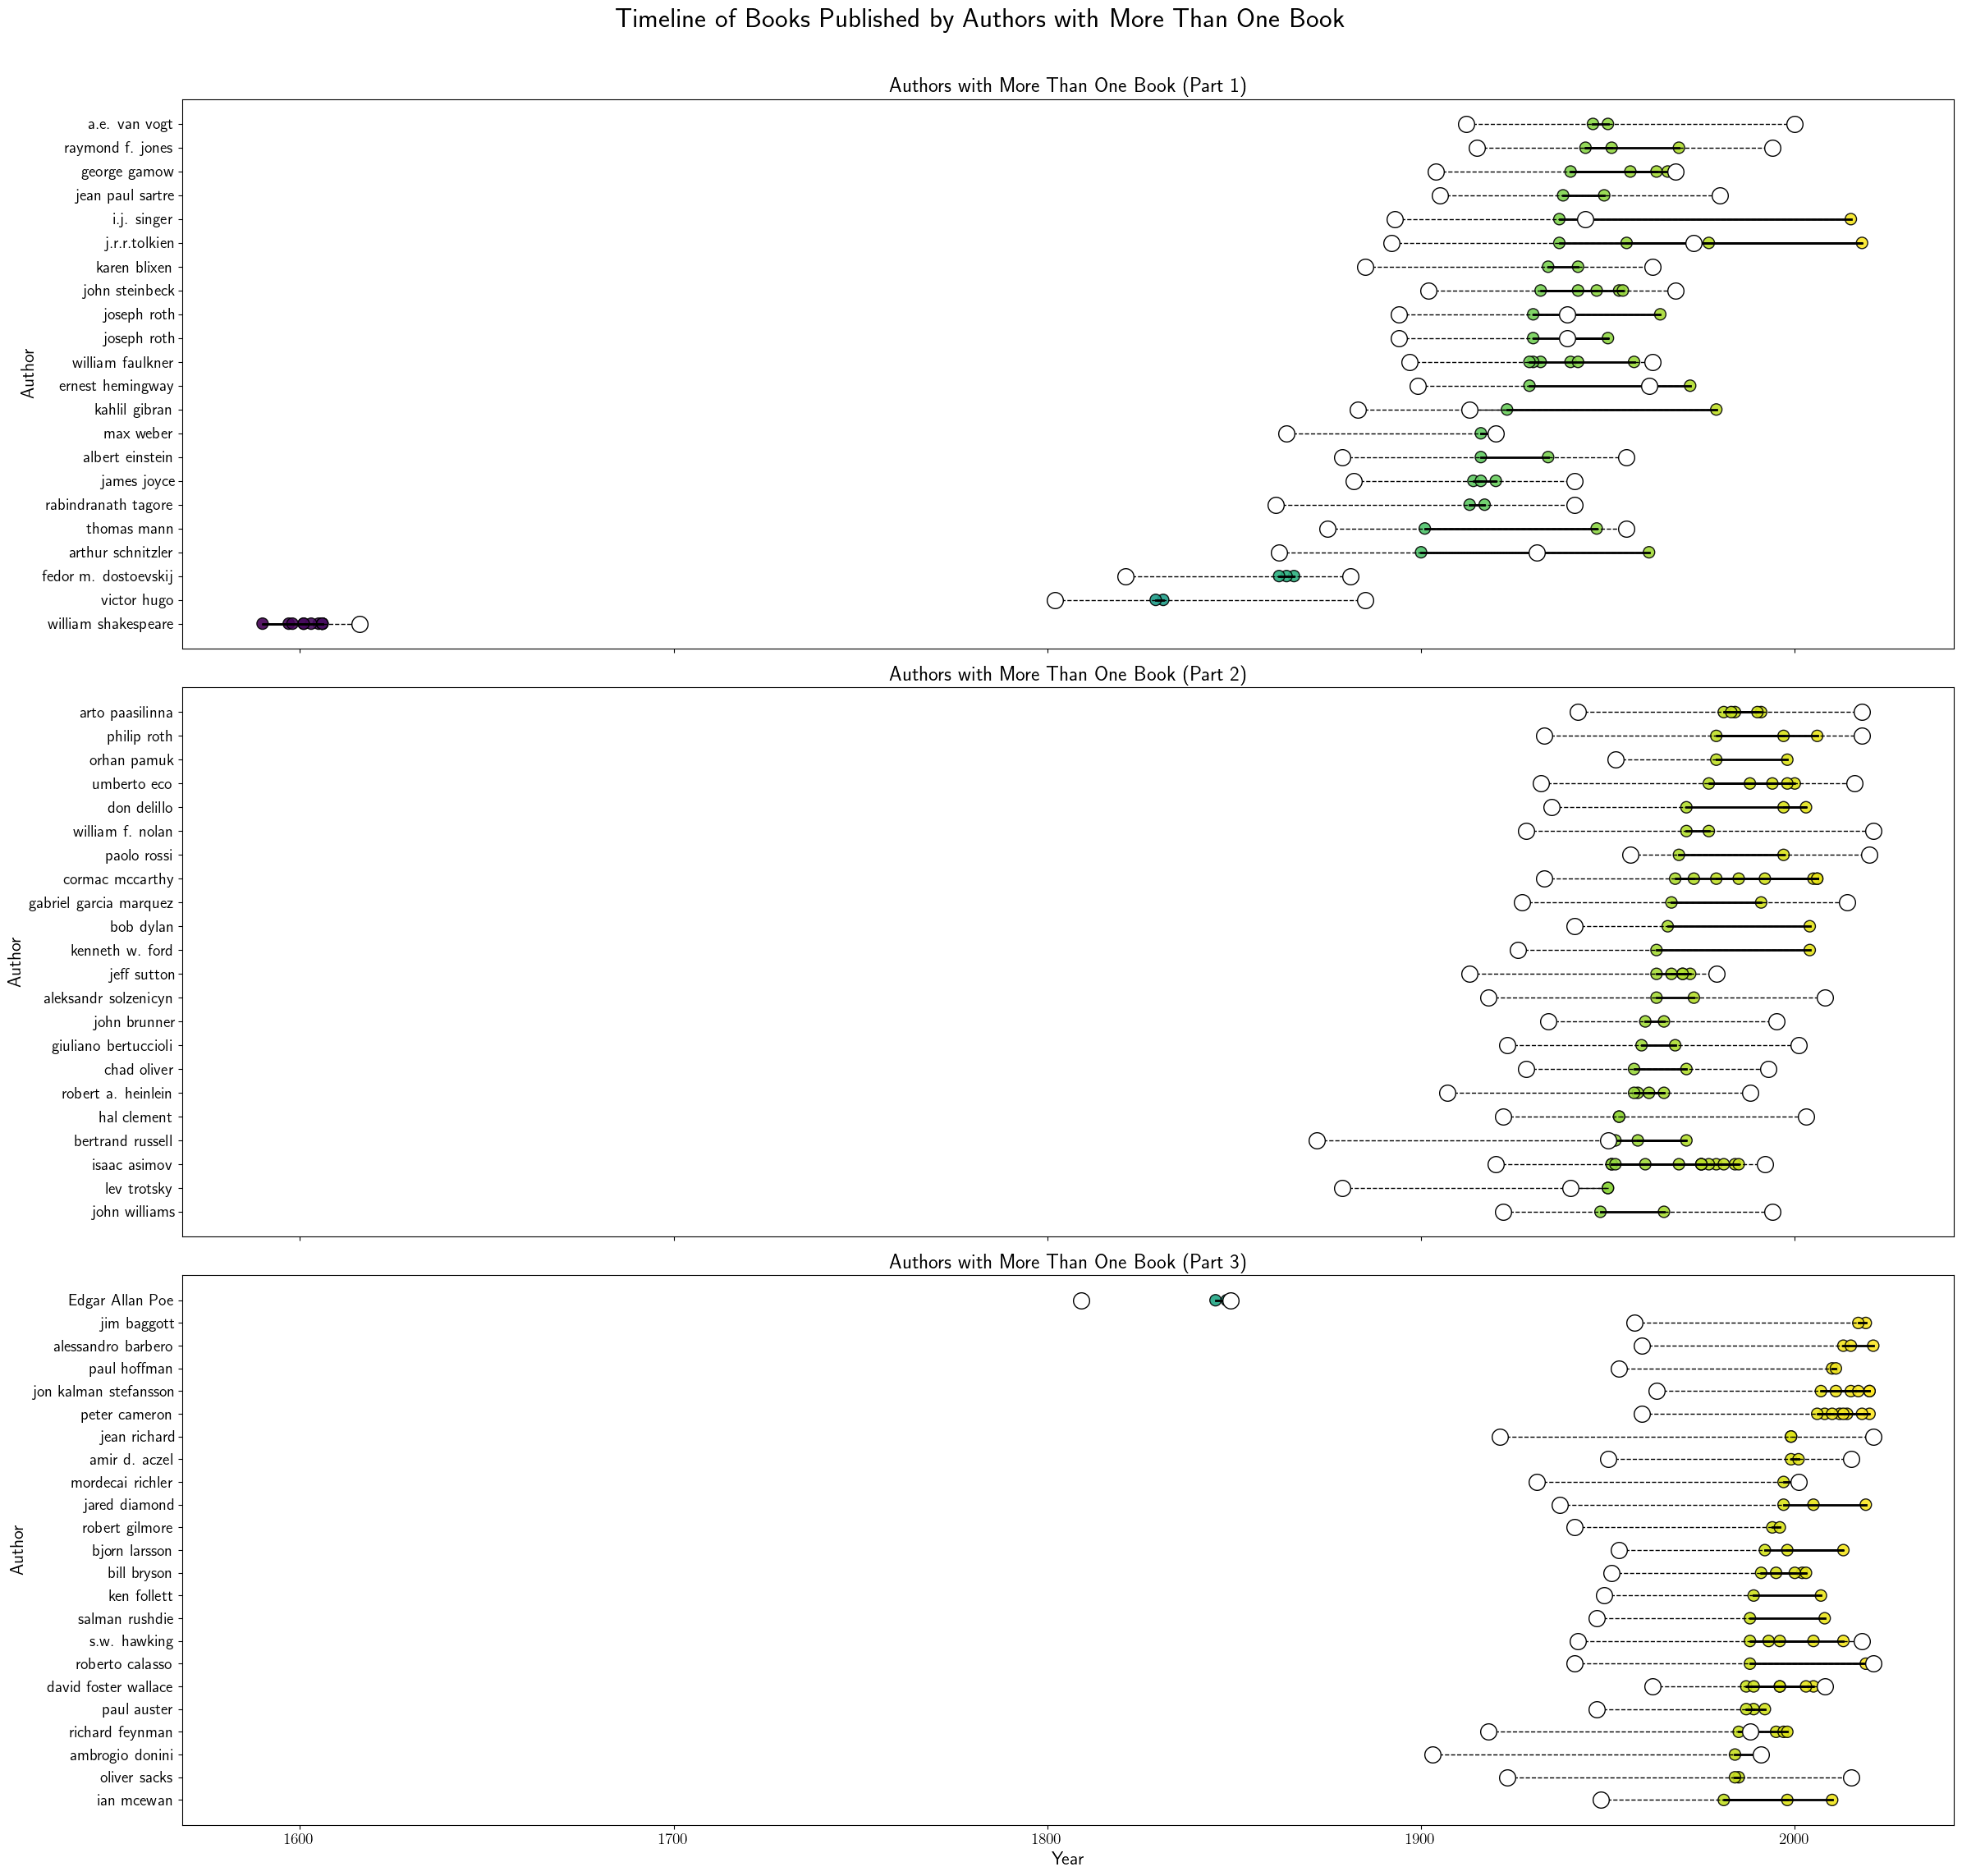

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Divide the authors into three equal parts based on the number of rows in author_books
num_authors = len(author_books)
split_size = num_authors // 3

# Ensure we have three approximately equal parts
group_1 = author_books.iloc[:split_size]
group_2 = author_books.iloc[split_size:2 * split_size]
group_3 = author_books.iloc[2 * split_size:]

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(24, 24), sharex=True)

# Define colormap
norm = plt.Normalize(vmin=filtered_authors_df['publication_year'].min(), vmax=filtered_authors_df['publication_year'].max())
cmap = plt.cm.viridis

# Plot each group in a separate subplot
for idx, (group, ax) in enumerate(zip([group_1, group_2, group_3], axes)):
    for i, row in group.iterrows():
        years = row['publication_year']
        colors = [cmap(norm(year)) for year in years]
        
        # Plot each book for the author with an edge color
        ax.scatter(x=years, y=[row['author']] * len(years), c=colors, edgecolors='black', s=100, alpha=0.9)
        ax.plot(years, [row['author']] * len(years), color='black', lw=2)
        
        author_name = row['author']
        birth_year = pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author_name]['year of birth'].values[0], errors='coerce')
        death_year = pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author_name]['year of death'].values[0], errors='coerce')

        # Plot birth and death markers with lines
        if not np.isnan(birth_year):
            ax.scatter(birth_year, [author_name], color='white', edgecolors='black', s=200, marker='o', zorder=5)
            ax.plot([birth_year, years[0]], [author_name, author_name], color='black', linestyle='--', lw=1)

        if not np.isnan(death_year):
            ax.scatter(death_year, [author_name], color='white', edgecolors='black', s=200, marker='o', zorder=5)
            ax.plot([years[-1], death_year], [author_name, author_name], color='black', linestyle='--', lw=1)
    
    # Customize each subplot
    ax.set_title(f'Authors with More Than One Book (Part {idx + 1})', fontsize=18)
    ax.set_ylabel('Author')

# Set common x-axis label and adjust layout
fig.suptitle('Timeline of Books Published by Authors with More Than One Book', fontsize=24)
plt.xlabel('Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
# Save the plot
plt.savefig('notebook_images/timeline_adjusted_divided.png')
plt.show()


In [84]:
# # Assuming filtered_authors_df and author_books are already defined from previous steps

# # Step 1: Add 'year of birth' column to author_books for sorting
# author_books['birth_year'] = author_books['author'].apply(
#     lambda author: pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author]['year of birth'].values[0], errors='coerce')
# )

# # Sort by 'birth_year' and reset the index
# author_books = author_books.sort_values(by='birth_year').reset_index(drop=True)

# # Step 2: Split into three approximately equal groups
# num_authors = len(author_books)
# split_size = num_authors // 3

# group_1 = author_books.iloc[:split_size]
# group_2 = author_books.iloc[split_size:2 * split_size]
# group_3 = author_books.iloc[2 * split_size:]

# # Step 3: Create the figure with three subplots, without sharing y-axis
# fig, axes = plt.subplots(3, 1, figsize=(24, 24), sharey=False)

# # Define colormap
# norm = plt.Normalize(vmin=filtered_authors_df['publication_year'].min(), vmax=filtered_authors_df['publication_year'].max())
# cmap = plt.cm.viridis

# # Plot each group in its own subplot
# for idx, (group, ax) in enumerate(zip([group_1, group_2, group_3], axes)):
#     # Determine x-axis limits for the current group based on birth and death years
#     birth_years = group['birth_year'].dropna()
#     death_years = group.apply(lambda row: pd.to_numeric(
#         filtered_authors_df[filtered_authors_df['author'] == row['author']]['year of death'].values[0], errors='coerce'), axis=1
#     ).dropna()

#     x_min = birth_years.min() - 10 if not birth_years.empty else filtered_authors_df['publication_year'].min() - 10
#     x_max = death_years.max() + 10 if not death_years.empty else filtered_authors_df['publication_year'].max() + 10
#     ax.set_xlim(x_min, x_max)

#     # Plot each author’s publication years with lines and markers
#     for i, row in group.iterrows():
#         years = row['publication_year']
#         colors = [cmap(norm(year)) for year in years]
        
#         ax.scatter(x=years, y=[row['author']] * len(years), c=colors, edgecolors='black', s=100, alpha=0.9)
#         ax.plot(years, [row['author']] * len(years), color='black', lw=2)

#         # Add birth and death markers for each author
#         author_name = row['author']
#         birth_year = row['birth_year']
#         death_year = pd.to_numeric(filtered_authors_df[filtered_authors_df['author'] == author_name]['year of death'].values[0], errors='coerce')

#         if not np.isnan(birth_year):
#             ax.scatter(birth_year, [author_name], color='white', edgecolors='black', s=200, marker='o', zorder=5)
#             ax.plot([birth_year, years[0]], [author_name, author_name], color='black', linestyle='--', lw=1)

#         if not np.isnan(death_year):
#             ax.scatter(death_year, [author_name], color='white', edgecolors='black', s=200, marker='o', zorder=5)
#             ax.plot([years[-1], death_year], [author_name, author_name], color='black', linestyle='--', lw=1)
    
#     # Customize subplot titles and labels
#     ax.set_title(f'Authors with More Than One Book (Part {idx + 1})', fontsize=18)
#     ax.set_ylabel('Author')

#     # Set y-ticks only for authors in the current group
#     ax.set_yticks(range(len(group)))
#     ax.set_yticklabels(group['author'])

#     # Set x-axis label with dynamic years range for each subplot
#     ax.set_xlabel(f'Year Range: {int(x_min)} - {int(x_max)}')

# # Set main title and adjust layout
# fig.suptitle('Timeline of Books Published by Authors with More Than One Book (Excluding Shared Books)', fontsize=24)
# plt.tight_layout(rect=[0, 0.03, 1, 0.97])

# plt.show()


/var/folders/j4/6b1360d55ljdykkmtn15fj800000gn/T/ipykernel_54298/690451107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:, 'title_cleaned'] = filtered_df['title'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))


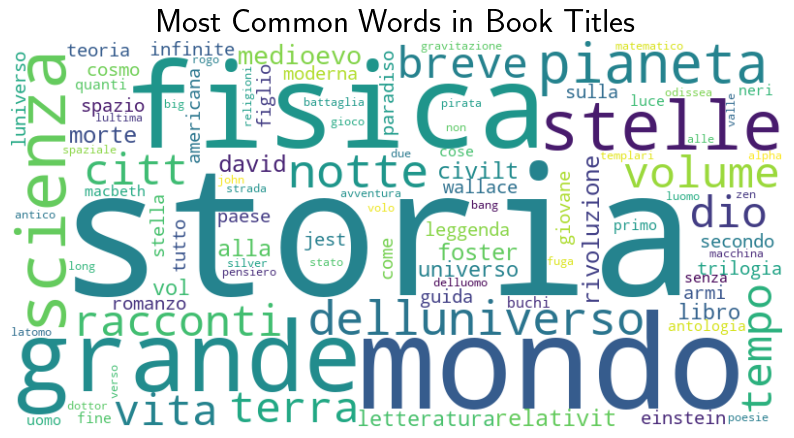

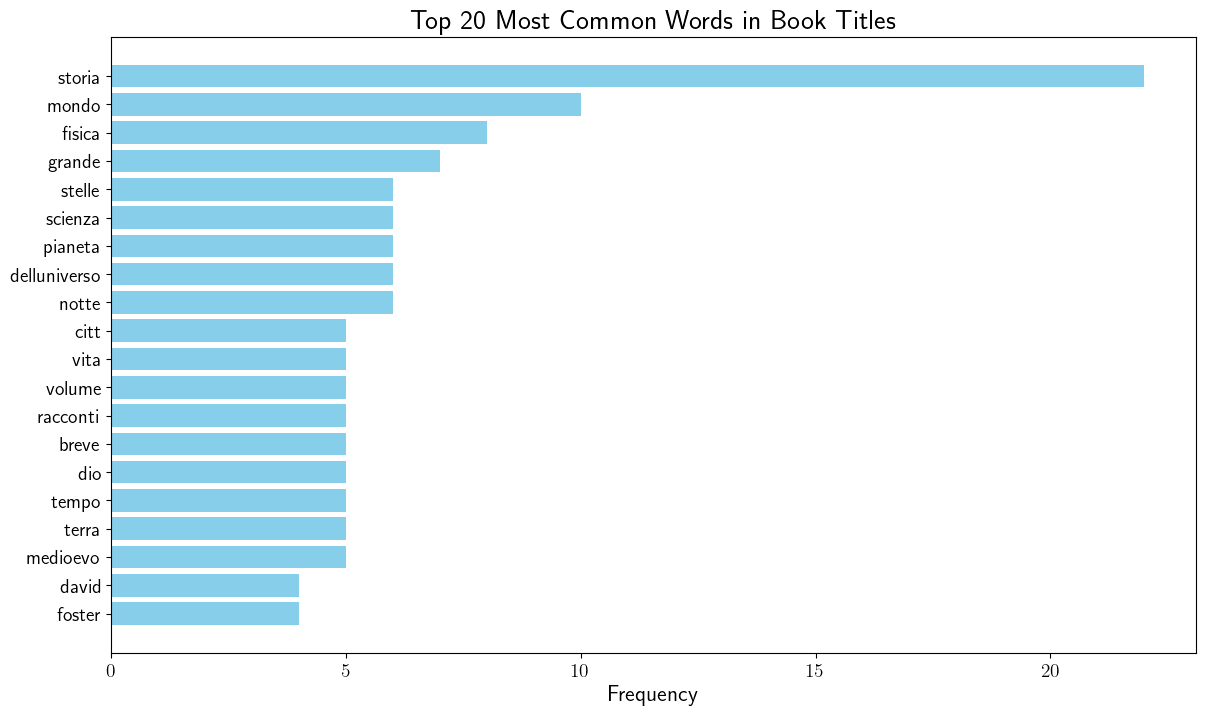

In [85]:
# Step 1: Extract words from titles
# Convert to lowercase and remove non-alphabet characters
filtered_df.loc[:, 'title_cleaned'] = filtered_df['title'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))

# Flatten the list of words from all titles
all_words = ' '.join(filtered_df['title_cleaned']).split()

# Step 2: Define stop words (including custom words like "il", "a", "lo")
custom_stopwords = set(stopwords.words('english') + 
                       ["il", "lo", "la", "i", "gli", "le", "e", "del", "della", "dei", 
                        "degli", "dello", "delle", "un", "una", "uno", "di", "in", "su", 
                        "per", "con", "fra", "da", "tra", "dal", "dai", "dallo", "dagli", "dalle",
                        "nei", "nelle", "nei", "nello", "che", "nel", "chi", "dell'", "l'"])

# Remove stop words from the list of all words
filtered_words = [word for word in all_words if word not in custom_stopwords]

# Step 3: Create the word cloud
word_counts = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_counts)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Most Common Words in Book Titles', fontsize=24)
# Save the plot
plt.savefig('notebook_images/words_book_titles.png')
most_common_words = word_counts.most_common(20)  # Adjust the number for more or fewer words
words, counts = zip(*most_common_words)
plt.figure(figsize=(14, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Words in Book Titles')
plt.gca().invert_yaxis()  # Highest frequency at the top
# Save the plot
plt.savefig('notebook_images/words_book_titles_hist.png')
plt.show()

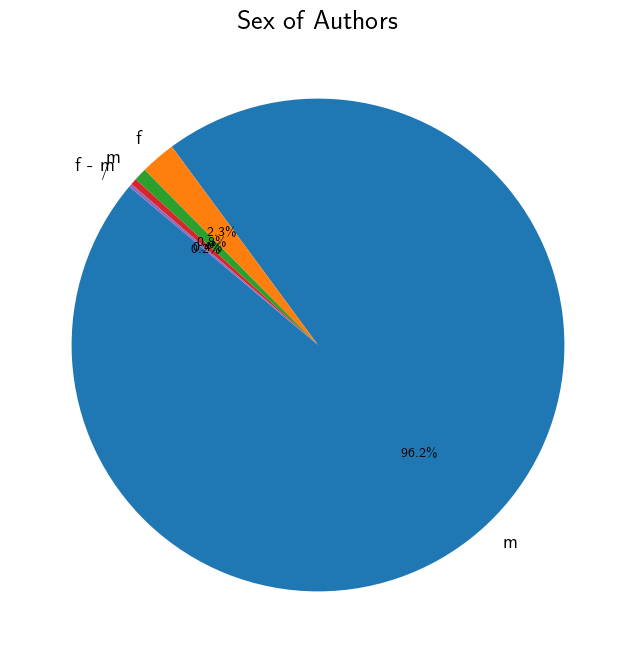

In [86]:
# Count occurrences and filter top sexes
sex_counts = df_expanded['sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, 
        labels=sex_counts.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title('Sex of Authors')
plt.savefig('notebook_images/pie_chart_sex.png')
# Save the plot
plt.savefig('notebook_images/sex_of_authors.png')
plt.show()